<a href="https://colab.research.google.com/github/sp-coding-enthusiast/Identifying_Key_Entities_Recipe_Data/blob/main/Identifying_Key_Entities_Recipe_Data_Starter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Identifying Key Entities in Recipe Data**


**Business Objective**:
The goal of this assignment is to train a Named Entity Recognition (NER) model using Conditional Random Fields (CRF) to extract key entities from recipe data. The model will classify words into predefined categories such as ingredients, quantities and units, enabling the creation of a structured database of recipes and ingredients that can be used to power advanced features in recipe management systems, dietary tracking apps, or e-commerce platforms.

### **Data Description**
The given data is in JSON format, representing a **structured recipe ingredient list** with **Named Entity Recognition (NER) labels**. Below is a breakdown of the data fields:

```json
[
    {
        "input": "6 Karela Bitter Gourd Pavakkai Salt 1 Onion 3 tablespoon Gram flour besan 2 teaspoons Turmeric powder Haldi Red Chilli Cumin seeds Jeera Coriander Powder Dhania Amchur Dry Mango Sunflower Oil",
        "pos": "quantity ingredient ingredient ingredient ingredient ingredient quantity ingredient quantity unit ingredient ingredient ingredient quantity unit ingredient ingredient ingredient ingredient ingredient ingredient ingredient ingredient ingredient ingredient ingredient ingredient ingredient ingredient ingredient ingredient"
    },
    {
      "input": "2-1/2 cups rice cooked 3 tomatoes teaspoons BC Belle Bhat powder 1 teaspoon chickpea lentils 1/2 cumin seeds white urad dal mustard green chilli dry red 2 cashew or peanuts 1-1/2 tablespoon oil asafoetida",
      "pos": "quantity unit ingredient ingredient quantity ingredient unit ingredient ingredient ingredient ingredient quantity unit ingredient ingredient quantity ingredient ingredient ingredient ingredient ingredient ingredient ingredient ingredient ingredient ingredient quantity ingredient ingredient ingredient quantity unit ingredient ingredient"
    }
]


| **Key**  | **Description**  |
|----------|-----------------|
| `input`  | Contains a raw ingredient list from a recipe. |
| `pos`    | Represents the corresponding part-of-speech (POS) tags or NER labels, identifying quantities, ingredients, and units. |


## **1** Import libraries

#### **1.1** Installation of sklearn-crfsuite

sklearn-crfsuite is a Python wrapper for CRFsuite, a fast and efficient implementation of Conditional Random Fields (CRFs). It is designed to integrate seamlessly with scikit-learn for structured prediction tasks such as Named Entity Recognition (NER), Part-of-Speech (POS) tagging, and chunking.

In [41]:
# installation of sklearn_crfsuite
!pip install sklearn_crfsuite==0.5.0

#### **1.2** Import necessary libraries

In [42]:
# Import warnings
import warnings
warnings.filterwarnings('ignore')

Imports the warnings module and then sets a filter to 'ignore' all warnings that might be generated during the execution of the code. This is often done to prevent warning messages from cluttering the output, especially in development or demonstration environments.

In [43]:
# Import necessary libraries
import json  # For handling JSON data
import pandas as pd  # For data manipulation and analysis
import re  # For regular expressions (useful for text preprocessing)
import matplotlib.pyplot as plt  # For visualisation
import seaborn as sns  # For advanced data visualisation
import sklearn_crfsuite  # CRF (Conditional Random Fields) implementation for sequence modeling
import numpy as np  # For numerical computations
# Saving and loading machine learning models
import joblib
import random
import spacy
from IPython.display import display, Markdown # For displaying well-formatted output

from fractions import Fraction  # For handling fractional values in numerical data
# Importing tools for feature engineering and model training
from collections import Counter  # For counting occurrences of elements in a list
from sklearn.model_selection import train_test_split  # For splitting dataset into train and test sets
from sklearn_crfsuite import metrics  # For evaluating CRF models
from sklearn_crfsuite.metrics import flat_classification_report
from sklearn.utils.class_weight import compute_class_weight
from collections import Counter
from sklearn.metrics import confusion_matrix

**Note** - Imports a comprehensive set of Python libraries for a machine learning project, likely focused on Natural Language Processing (NLP) and Named Entity Recognition (NER) using Conditional Random Fields (CRF).

It covers:

- Data Handling: json for JSON data, pandas for DataFrame operations, re for regular expressions, numpy for numerical computations.
- Visualization: matplotlib.pyplot and seaborn for creating plots and charts.
NLP & Machine Learning: spacy for advanced NLP tasks, sklearn_crfsuite for CRF model implementation, and sklearn.model_selection, sklearn.metrics, sklearn.utils.class_weight for model training, evaluation, and handling class imbalances.
- Utilities: joblib for saving/loading models, random for randomness, fractions for handling fractions, collections.Counter for frequency counting, and IPython.display for enhanced output in notebooks.

In [44]:
# Ensure pandas displays full content
pd.set_option('display.max_colwidth', None)
pd.set_option('display.expand_frame_repr', False)

This code snippet uses pandas.set_option to configure how pandas DataFrames are displayed in the output:

- pd.set_option('display.max_colwidth', None): This ensures that the full content of each column in a DataFrame is displayed, preventing text from being truncated. This is particularly useful when dealing with columns containing long strings.

- pd.set_option('display.expand_frame_repr', False): This prevents pandas from wrapping the display of wide DataFrames onto multiple lines, making them easier to read horizontally.

## **2** Data Ingestion and Preparation <font color = red>[25 marks]</font> <br>

#### **2.1** *Read Recipe Data from Dataframe and prepare the data for analysis* <font color = red>[12 marks]</font> <br>
Read the data from JSON file, print first five rows and describe the dataframe

##### **2.1.1** **Define a *load_json_dataframe* function** <font color = red>[7 marks]</font> <br>

Define a function that takes path of the ingredient_and_quantity.json file and reads it, convert it into dataframe - df and return it.

In [45]:
from google.colab import drive
drive.mount('/content/drive/')


Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [46]:
# define a function to load json file to a dataframe
def load_json_dataframe(file_path):
    """
    Loads a JSON file from the given file_path and converts it into a pandas DataFrame.

    Args:
        file_path (str): The path to the JSON file.

    Returns:
        pandas.DataFrame: A DataFrame created from the JSON data.
    """
    with open(file_path, 'r') as f:
        data = json.load(f)
    df = pd.DataFrame(data)
    return df


- def load_json_dataframe(file_path):: This line defines a function named load_json_dataframe that takes one argument: file_path, which is expected to be a string representing the path to the JSON file.
- with open(file_path, 'r') as f:: This opens the JSON file specified by file_path in read mode ('r'). The with statement ensures that the file is properly closed after its block is exited, even if errors occur.
- data = json.load(f): The json.load() method reads the JSON data from the opened file object f and parses it, converting it into a Python object (usually a list of dictionaries or a dictionary).
- df = pd.DataFrame(data): This line takes the Python object data (which is assumed to be in a format suitable for DataFrame creation, like a list of dictionaries) and converts it into a pandas DataFrame. pd is an alias for the pandas library.
- return df: Finally, the function returns the newly created pandas DataFrame.

##### **2.1.2** **Execute the *load_json_dataframe* function** <font color = red>[2 marks]</font> <br>

In [47]:
# read the json file by giving the file path and create a dataframe
file_path = '/content/drive/MyDrive/ingredient_and_quantity.json'
df = load_json_dataframe(file_path)


This code snippet reads a JSON file from a specified path and loads it into a pandas DataFrame using the load_json_dataframe function that was defined earlier.

- file_path = '/content/drive/MyDrive/ingredient_and_quantity.json': This line defines a string variable named file_path and assigns it the absolute path to your JSON file, which is expected to be located in your Google Drive.
- df = load_json_dataframe(file_path): This line calls the load_json_dataframe function (which we just discussed) and passes the file_path as an argument. The function then reads the JSON file, converts its content into a pandas DataFrame, and returns that DataFrame. This returned DataFrame is then assigned to the variable df.

##### **2.1.3** **Describe the dataframe** <font color = red>[3 marks]</font> <br>

Print first five rows of dataframe along with dimensions. Display the information of dataframe

In [48]:
# display first five rows of the dataframe - df
display(df.head())


,input,pos
0,6 Karela Bitter Gourd Pavakkai Salt 1 Onion 3 tablespoon Gram flour besan 2 teaspoons Turmeric powder Haldi Red Chilli Cumin seeds Jeera Coriander Powder Dhania Amchur Dry Mango Sunflower Oil,quantity ingredient ingredient ingredient ingredient ingredient quantity ingredient quantity unit ingredient ingredient ingredient quantity unit ingredient ingredient ingredient ingredient ingredient ingredient ingredient ingredient ingredient ingredient ingredient ingredient ingredient ingredient ingredient ingredient
1,2-1/2 cups rice cooked 3 tomatoes teaspoons BC Belle Bhat powder 1 teaspoon chickpea lentils 1/2 cumin seeds white urad dal mustard green chilli dry red 2 cashew or peanuts 1-1/2 tablespoon oil asafoetida,quantity unit ingredient ingredient quantity ingredient unit ingredient ingredient ingredient ingredient quantity unit ingredient ingredient quantity ingredient ingredient ingredient ingredient ingredient ingredient ingredient ingredient ingredient ingredient quantity ingredient ingredient ingredient quantity unit ingredient ingredient
2,1-1/2 cups Rice Vermicelli Noodles Thin 1 Onion sliced 1/2 cup Carrots Gajjar chopped 1/3 Green peas Matar 2 Chillies 1/4 teaspoon Asafoetida hing Mustard seeds White Urad Dal Split Ghee sprig Curry leaves Salt Lemon juice,quantity unit ingredient ingredient ingredient ingredient quantity ingredient ingredient quantity unit ingredient ingredient ingredient quantity ingredient ingredient ingredient quantity ingredient quantity unit ingredient ingredient ingredient ingredient ingredient ingredient ingredient ingredient ingredient unit ingredient ingredient ingredient ingredient ingredient
3,500 grams Chicken 2 Onion chopped 1 Tomato 4 Green Chillies slit inch Ginger finely 6 cloves Garlic 1/2 teaspoon Turmeric powder Haldi Garam masala tablespoon Sesame Gingelly Oil 1/4 Methi Seeds Fenugreek Coriander Dhania Dry Red Fennel seeds Saunf cups Sorrel Leaves Gongura picked and,quantity unit ingredient quantity ingredient ingredient quantity ingredient quantity ingredient ingredient ingredient unit ingredient ingredient quantity unit ingredient quantity unit ingredient ingredient ingredient ingredient ingredient unit ingredient ingredient ingredient quantity ingredient ingredient ingredient ingredient ingredient ingredient ingredient ingredient ingredient ingredient unit ingredient ingredient ingredient ingredient ingredient
4,1 tablespoon chana dal white urad 2 red chillies coriander seeds 3 inches ginger onion tomato Teaspoon mustard asafoetida sprig curry,quantity unit ingredient ingredient ingredient ingredient quantity ingredient ingredient ingredient ingredient quantity unit ingredient ingredient ingredient unit ingredient ingredient unit ingredient


The display(df.head()) command is used to show the first 5 rows of a pandas DataFrame in a nicely formatted table.

In [49]:
# print the dimensions of dataframe - df
print(f"DataFrame dimensions: {df.shape}")

DataFrame dimensions: (285, 2)


This code snippet prints the dimensions of the DataFrame, showing the number of rows and columns it contains.

In [50]:
# print the information of the dataframe
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 285 entries, 0 to 284
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   input   285 non-null    object
 1   pos     285 non-null    object
dtypes: object(2)
memory usage: 4.6+ KB


Both columns show 285 non-null values out of 285 entries, it tells you that there are no missing values in either the input or pos columns of your DataFrame.

#### **2.2** *Recipe Data Manipulation* <font color = red>[13 marks]</font> <br>
Create derived metrics in dataframe and provide insights of the dataframe

##### **2.2.1** **Create input_tokens and pos_tokens columns by splitting the input and pos from the dataframe** <font color = red>[3 marks]</font> <br>
Split the input and pos into input_tokens and pos_tokens in the dataframe and display it in the dataframe

In [51]:
# split the input and pos into input_tokens and pos_tokens in the dataframe

# Tokenize input
df['input_tokens'] = df['input'].apply(lambda x: x.split())
# Tokenize POS
df['pos_tokens'] = df['pos'].apply(lambda x: x.split())


The above lines are converting long strings of words and tags into lists of individual words and tags, making them easier to process for NLP tasks

In [52]:
# display first five rows of the dataframe - df
display(df.head())


,input,pos,input_tokens,pos_tokens
0,6 Karela Bitter Gourd Pavakkai Salt 1 Onion 3 tablespoon Gram flour besan 2 teaspoons Turmeric powder Haldi Red Chilli Cumin seeds Jeera Coriander Powder Dhania Amchur Dry Mango Sunflower Oil,quantity ingredient ingredient ingredient ingredient ingredient quantity ingredient quantity unit ingredient ingredient ingredient quantity unit ingredient ingredient ingredient ingredient ingredient ingredient ingredient ingredient ingredient ingredient ingredient ingredient ingredient ingredient ingredient ingredient,"[6, Karela, Bitter, Gourd, Pavakkai, Salt, 1, Onion, 3, tablespoon, Gram, flour, besan, 2, teaspoons, Turmeric, powder, Haldi, Red, Chilli, Cumin, seeds, Jeera, Coriander, Powder, Dhania, Amchur, Dry, Mango, Sunflower, Oil]","[quantity, ingredient, ingredient, ingredient, ingredient, ingredient, quantity, ingredient, quantity, unit, ingredient, ingredient, ingredient, quantity, unit, ingredient, ingredient, ingredient, ingredient, ingredient, ingredient, ingredient, ingredient, ingredient, ingredient, ingredient, ingredient, ingredient, ingredient, ingredient, ingredient]"
1,2-1/2 cups rice cooked 3 tomatoes teaspoons BC Belle Bhat powder 1 teaspoon chickpea lentils 1/2 cumin seeds white urad dal mustard green chilli dry red 2 cashew or peanuts 1-1/2 tablespoon oil asafoetida,quantity unit ingredient ingredient quantity ingredient unit ingredient ingredient ingredient ingredient quantity unit ingredient ingredient quantity ingredient ingredient ingredient ingredient ingredient ingredient ingredient ingredient ingredient ingredient quantity ingredient ingredient ingredient quantity unit ingredient ingredient,"[2-1/2, cups, rice, cooked, 3, tomatoes, teaspoons, BC, Belle, Bhat, powder, 1, teaspoon, chickpea, lentils, 1/2, cumin, seeds, white, urad, dal, mustard, green, chilli, dry, red, 2, cashew, or, peanuts, 1-1/2, tablespoon, oil, asafoetida]","[quantity, unit, ingredient, ingredient, quantity, ingredient, unit, ingredient, ingredient, ingredient, ingredient, quantity, unit, ingredient, ingredient, quantity, ingredient, ingredient, ingredient, ingredient, ingredient, ingredient, ingredient, ingredient, ingredient, ingredient, quantity, ingredient, ingredient, ingredient, quantity, unit, ingredient, ingredient]"
2,1-1/2 cups Rice Vermicelli Noodles Thin 1 Onion sliced 1/2 cup Carrots Gajjar chopped 1/3 Green peas Matar 2 Chillies 1/4 teaspoon Asafoetida hing Mustard seeds White Urad Dal Split Ghee sprig Curry leaves Salt Lemon juice,quantity unit ingredient ingredient ingredient ingredient quantity ingredient ingredient quantity unit ingredient ingredient ingredient quantity ingredient ingredient ingredient quantity ingredient quantity unit ingredient ingredient ingredient ingredient ingredient ingredient ingredient ingredient ingredient unit ingredient ingredient ingredient ingredient ingredient,"[1-1/2, cups, Rice, Vermicelli, Noodles, Thin, 1, Onion, sliced, 1/2, cup, Carrots, Gajjar, chopped, 1/3, Green, peas, Matar, 2, Chillies, 1/4, teaspoon, Asafoetida, hing, Mustard, seeds, White, Urad, Dal, Split, Ghee, sprig, Curry, leaves, Salt, Lemon, juice]","[quantity, unit, ingredient, ingredient, ingredient, ingredient, quantity, ingredient, ingredient, quantity, unit, ingredient, ingredient, ingredient, quantity, ingredient, ingredient, ingredient, quantity, ingredient, quantity, unit, ingredient, ingredient, ingredient, ingredient, ingredient, ingredient, ingredient, ingredient, ingredient, unit, ingredient, ingredient, ingredient, ingredient, ingredient]"
3,500 grams Chicken 2 Onion chopped 1 Tomato 4 Green Chillies slit inch Ginger finely 6 cloves Garlic 1/2 teaspoon Turmeric powder Haldi Garam masala tablespoon Sesame Gingelly Oil 1/4 Methi Seeds Fenugreek Coriander Dhania Dry Red Fennel seeds Saunf cups Sorrel Leaves Gongura picked and,quantity unit ingredient quantity ingredient ingredient quantity ingredient quantity ingredient ingredient ingredient unit ingredient ingredient qua

The display(df.head()) command is used to show the first 5 rows of a pandas DataFrame in a nicely formatted table.

##### **2.2.2** **Provide the length for input_tokens and pos_tokens and validate their length** <font color = red>[2 marks]</font> <br>

Create input_length and pos_length columns in the dataframe and validate both the lengths. Check for the rows that are unequal in input and pos length


In [53]:
# create input_length and pos_length columns for the input_tokens and pos-tokens
df['input_length'] = df['input_tokens'].apply(len)
df['pos_length'] = df['pos_tokens'].apply(len)


The above lines create two new columns, input_length and pos_length, in the DataFrame, which store the number of tokens (words or tags) present in the input_tokens and pos_tokens lists for each recipe, respectively.

In [54]:
# check for the equality of input_length and pos_length in the dataframe
inequal_rows = df[df['input_length'] != df['pos_length']]
if not inequal_rows.empty:
    print("Rows where input_length and pos_length are unequal:")
    display(inequal_rows[['input_length', 'pos_length', 'input_tokens', 'pos_tokens']])
else:
    print("All input_length and pos_length are equal.")


Rows where input_length and pos_length are unequal:


,input_length,pos_length,input_tokens,pos_tokens
17,15,14,"[2, cups, curd, 1, cup, gourd, cucumber, green, cor, coriander, 1/2, teaspoon, cumin, powder, salt]","[quantity, unit, ingredient, quantity, unit, ingredient, ingredient, ingredient, ingredient, quantity, unit, ingredient, ingredient, ingredient]"
27,37,36,"[1, Baguette, sliced, 1, 1/2, tablespoon, Butter, 1/2, Garlic, minced, cup, Spinach, Leaves, Palak, Red, Bell, pepper, Capsicum, Tomato, finely, chopped, Onion, Black, powder, Italian, seasoning, teaspoon, Fresh, cream, Cheddar, cheese, grated, Salt, Roasted, tomato, pasta, sauce]","[quantity, ingredient, ingredient, quantity, unit, ingredient, quantity, ingredient, ingredient, unit, ingredient, ingredient, ingredient, ingredient, ingredient, ingredient, ingredient, ingredient, ingredient, ingredient, ingredient, ingredient, ingredient, ingredient, ingredient, unit, ingredient, ingredient, ingredient, ingredient, ingredient, ingredient, ingredient, ingredient, ingredient, ingredient]"
79,38,37,"[1/2, cup, Poha, Flattened, rice, 2, tablespoons, Rice, flour, 2, 1/2, liter, Milk, 1, Nolen, Gur, or, brown, sugar, Cardamom, Elaichi, Pods/Seeds, 8-10, Mixed, nuts, almonds/cashews, tablespoon, Raisins, pinch, Saffron, strands, and, a, little, more, for, garnish, Salt]","[quantity, unit, ingredient, ingredient, ingredient, quantity, unit, ingredient, ingredient, quantity, unit, ingredient, quantity, ingredient, ingredient, ingredient, ingredient, ingredient, ingredient, ingredient, ingredient, quantity, ingredient, ingredient, ingredient, unit, ingredient, unit, ingredient, ingredient, ingredient, ingredient, ingredient, ingredient, ingredient, ingredient, ingredient]"
164,54,53,"[1/2, cup, All, Purpose, Flour, Maida, Whole, Wheat, 1/4, Hung, Curd, Greek, Yogurt, 250, grams, Chicken, minced, 1, Spinach, Leaves, Palak, finely, chopped, Onion, 4, cloves, Garlic, Tomatoes, tablespoon, Cumin, powder, Jeera, Coriander, Powder, Dhania, 1, 1/2, teaspoon, Paprika, Black, pepper, 3, sprig, Mint, Pudina, 10, Spring, Bulb, &, Greens, 100, Feta, Cheese, crumbled]","[quantity, unit, ingredient, ingredient, ingredient, ingredient, ingredient, ingredient, quantity, ingredient, ingredient, ingredient, ingredient, quantity, unit, ingredient, ingredient, quantity, ingredient, ingredient, ingredient, ingredient, ingredient, ingredient, quantity, unit, ingredient, ingredient, unit, ingredient, ingredient, ingredient, ingredient, ingredient, ingredient, quantity, unit, ingredient, ingredient, ingredient, quantity, unit, ingredient, ingredient, quantity, ingredient, ingredient, ingredient, ingredient, quantity, ingredient, ingredient, ingredient]"
207,18,17,"[1, cup, Cashew, nuts, Badam, Almond, 1, 1/4, cups, Sugar, 1/2, Water, teaspoon, Cardamom, Powder, Ghee, for, greasing]","[quantity, unit, ingredient, ingredient, ingredient, ingredient, quantity, unit, ingredient, quantity, ingredient, unit, ingredient, ingredient, ingredient, unit, ingredient]"


This code identifies and displays any rows where the number of input tokens does not match the number of POS tokens. If no such rows are found, it confirms that all lengths are equal, ensuring data consistency for further processing

##### **2.2.3** **Define a unique_labels function and validate the labels in pos_tokens** <font color = red>[2 marks]</font> <br>

Define a unique_labels function which checks for all the unique pos labels in the recipe & execute it.


In [55]:
# Define a unique_labels function to checks for all the unique pos labels in the recipe & print it
def unique_labels(df):
    all_labels = []
    for labels_list in df['pos_tokens']:
        all_labels.extend(labels_list)
    return sorted(list(set(all_labels)))

# Get and print unique labels from the DataFrame
print("Unique POS labels:", unique_labels(df))


Unique POS labels: ['ingredient', 'quantity', 'unit']


The above code is checking for all the unique POS labels in the recipe and print it.

Unique POS labels: ['ingredient', 'quantity', 'unit']


##### **2.2.3** **Provide the insights seen in the recipe data after validation** <font color = red>[1 marks]</font> <br>

Provide the indexes that requires cleaning and formatting in the dataframe


Based on the previous validation step, the rows that had unequal input and POS token lengths are at the following indices: 17, 27, 79, 164, 207.


##### **2.2.4** **Drop the rows that have invalid data provided in previous cell** <font color = red> [2 marks]</font> <br>

In [56]:
# dropped_indices = [17, 27, 79, 164, 207]
dropped_indices = [17, 27, 79, 164, 207]
df = df.drop(index=dropped_indices).reset_index(drop=True)

Dropped index that have invalid data.

Dropped_indices = [17, 27, 79, 164, 207]


##### **2.2.5** **Update the input_length & pos_length in dataframe**<font color = red> [2 marks]</font> <br>

In [57]:
# update the input and pos length in input_length and pos_length
df['input_length'] = df['input_tokens'].apply(len)
df['pos_length'] = df['pos_tokens'].apply(len)

These lines update the input_length and pos_length columns in the DataFrame by recalculating the number of tokens in the input_tokens and pos_tokens lists after previous modifications to the DataFrame.

##### **2.2.6** **Validate the input_length and pos_length by checking unequal rows** <font color = red> [1 marks]</font> <br>

In [58]:
# validate the input length and pos length as input_length and pos_length
inequal_rows = df[df['input_length'] != df['pos_length']]
if not inequal_rows.empty:
    print("Rows where input_length and pos_length are unequal:")
    display(inequal_rows[['input_length', 'pos_length', 'input_tokens', 'pos_tokens']])
else:
    print("All input_length and pos_length are equal.")

All input_length and pos_length are equal.


These lines update the input_length and pos_length columns in the DataFrame by recalculating the number of tokens in the input_tokens and pos_tokens lists after previous modifications to the DataFrame.

## **3** Train Validation Split (70 train - 30 val) <font color = red>[6 marks]</font> <br>

#### **3.1** *Perform train and validation split ratio* <font color = red>[6 marks]</font> <br>
Split the dataset with the help of input_tokens and pos_tokens and make a ratio of 70:30 split for training and validation datasets.

###### **3.1.1** **Split the dataset into train_df and val_df into 70:30 ratio** <font color = red> [1 marks]</font> <br>

In [59]:
# split the dataset into training and validation sets
train_df, val_df = train_test_split(df, test_size=0.3, random_state=42)

Splitted the data into training and validation dataset

###### **3.1.2** **Print the first five rows of train_df and val_df** <font color = red> [1 marks]</font> <br>

In [60]:
# print the first five rows of train_df
display(train_df.head())

,input,pos,input_tokens,pos_tokens,input_length,pos_length
175,250 grams Okra Oil 1 Onion finely chopped Tomato Grated teaspoon Ginger 2 Garlic Finely 1/2 Cumin seeds 1/4 Teaspoon asafoetida cup cottage cheese pinched coriander powder mango red chilli turmeric,quantity unit ingredient ingredient quantity ingredient ingredient ingredient ingredient ingredient unit ingredient quantity ingredient ingredient quantity ingredient ingredient quantity unit ingredient unit ingredient ingredient ingredient ingredient ingredient ingredient ingredient ingredient ingredient,"[250, grams, Okra, Oil, 1, Onion, finely, chopped, Tomato, Grated, teaspoon, Ginger, 2, Garlic, Finely, 1/2, Cumin, seeds, 1/4, Teaspoon, asafoetida, cup, cottage, cheese, pinched, coriander, powder, mango, red, chilli, turmeric]","[quantity, unit, ingredient, ingredient, quantity, ingredient, ingredient, ingredient, ingredient, ingredient, unit, ingredient, quantity, ingredient, ingredient, quantity, ingredient, ingredient, quantity, unit, ingredient, unit, ingredient, ingredient, ingredient, ingredient, ingredient, ingredient, ingredient, ingredient, ingredient]",31,31
55,200 grams Paneer Homemade Cottage Cheese 2 Potato Aloo Bay leaf tej patta Dry Red Chilli 1 tablespoon Panch Phoran Masala roasted and powdered Tomato big sized teaspoon Turmeric powder Haldi Cumin seeds Jeera Ginger grated Salt 1/2 Sugar Sunflower Oil,quantity unit ingredient ingredient ingredient ingredient quantity ingredient ingredient ingredient ingredient ingredient ingredient ingredient ingredient ingredient quantity unit ingredient ingredient ingredient ingredient ingredient ingredient ingredient ingredient ingredient unit ingredient ingredient ingredient ingredient ingredient ingredient ingredient ingredient ingredient quantity ingredient ingredient ingredient,"[200, grams, Paneer, Homemade, Cottage, Cheese, 2, Potato, Aloo, Bay, leaf, tej, patta, Dry, Red, Chilli, 1, tablespoon, Panch, Phoran, Masala, roasted, and, powdered, Tomato, big, sized, teaspoon, Turmeric, powder, Haldi, Cumin, seeds, Jeera, Ginger, grated, Salt, 1/2, Sugar, Sunflower, Oil]","[quantity, unit, ingredient, ingredient, ingredient, ingredient, quantity, ingredient, ingredient, ingredient, ingredient, ingredient, ingredient, ingredient, ingredient, ingredient, quantity, unit, ingredient, ingredient, ingredient, ingredient, ingredient, ingredient, ingredient, ingredient, ingredient, unit, ingredient, ingredient, ingredient, ingredient, ingredient, ingredient, ingredient, ingredient, ingredient, quantity, ingredient, ingredient, ingredient]",41,41
109,500 grams Cabbage Patta Gobi Muttaikose 1 teaspoon Mustard seeds 1-1/2 White Urad Dal Split sprig Curry leaves Green Chilli 1/4 cup Fresh coconut Salt,quantity unit ingredient ingredient ingredient ingredient quantity unit ingredient ingredient quantity ingredient ingredient ingredient ingredient unit ingredient ingredient ingredient ingredient quantity unit ingredient ingredient ingredient,"[500, grams, Cabbage, Patta, Gobi, Muttaikose, 1, teaspoon, Mustard, seeds, 1-1/2, White, Urad, Dal, Split, sprig, Curry, leaves, Green, Chilli, 1/4, cup, Fresh, coconut, Salt]","[quantity, unit, ingredient, ingredient, ingredient, ingredient, quantity, unit, ingredient, ingredient, quantity, ingredient, ingredient, ingredient, ingredient, unit, ingredient, ingredient, ingredient, ingredient, quantity, unit, ingredient, ingredient, ingredient]",25,25
213,500 grams Fresh Figs 1/4 cup Lemon juice 1 teaspoon zest 2 Red Chilli flakes 1/2 Honey Brown Sugar (Demerara Sugar),quantity unit ingredient ingredient quantity unit ingredient ingredient quantity unit ingredient quantity ingredient ingredient ingredient quantity ingredient ingredient ingredient ingredient ingredient,"[500, grams, Fresh, Figs, 1/4, cup, Lemon, juice, 1, teaspoon, zest, 2, Red, Chilli, flakes, 1/2, Honey, Brown, Sugar, (Demerara, Sugar)]","[quantity, unit, ingredient, ingredient, quantity, unit, ingredient, ingredient, qua

Displayed the first five rows of training data to get insights

In [61]:
# print the first five rows of the val_df
display(val_df.head())

,input,pos,input_tokens,pos_tokens,input_length,pos_length
33,1 cup Ada 2 liter Milk 3/4 Sugar tablespoon Ghee 1/2 teaspoon Cardamom Powder Elaichi,quantity unit ingredient quantity unit ingredient quantity ingredient unit ingredient quantity unit ingredient ingredient ingredient,"[1, cup, Ada, 2, liter, Milk, 3/4, Sugar, tablespoon, Ghee, 1/2, teaspoon, Cardamom, Powder, Elaichi]","[quantity, unit, ingredient, quantity, unit, ingredient, quantity, ingredient, unit, ingredient, quantity, unit, ingredient, ingredient, ingredient]",15,15
108,1 Carrot Gajjar chopped 7 Potatoes Aloo 2 cups Cauliflower gobi cut to small florets Onion tablespoon Ginger Garlic Paste Salt teaspoons Sunflower Oil 1/2 cup Fresh coconut grated teaspoon Whole Black Peppercorns Green Chillies Fennel seeds Saunf Poppy 6 Cashew nuts inch Cinnamon Stick Dalchini Star anise 3 Cloves Laung Cardamom Elaichi Pods/Seeds Cumin Jeera,quantity ingredient ingredient ingredient quantity ingredient ingredient quantity unit ingredient ingredient ingredient ingredient ingredient ingredient ingredient unit ingredient ingredient ingredient ingredient unit ingredient ingredient quantity unit ingredient ingredient ingredient unit ingredient ingredient ingredient ingredient ingredient ingredient ingredient ingredient ingredient quantity ingredient ingredient unit ingredient ingredient ingredient ingredient ingredient quantity ingredient ingredient ingredient ingredient ingredient ingredient ingredient,"[1, Carrot, Gajjar, chopped, 7, Potatoes, Aloo, 2, cups, Cauliflower, gobi, cut, to, small, florets, Onion, tablespoon, Ginger, Garlic, Paste, Salt, teaspoons, Sunflower, Oil, 1/2, cup, Fresh, coconut, grated, teaspoon, Whole, Black, Peppercorns, Green, Chillies, Fennel, seeds, Saunf, Poppy, 6, Cashew, nuts, inch, Cinnamon, Stick, Dalchini, Star, anise, 3, Cloves, Laung, Cardamom, Elaichi, Pods/Seeds, Cumin, Jeera]","[quantity, ingredient, ingredient, ingredient, quantity, ingredient, ingredient, quantity, unit, ingredient, ingredient, ingredient, ingredient, ingredient, ingredient, ingredient, unit, ingredient, ingredient, ingredient, ingredient, unit, ingredient, ingredient, quantity, unit, ingredient, ingredient, ingredient, unit, ingredient, ingredient, ingredient, ingredient, ingredient, ingredient, ingredient, ingredient, ingredient, quantity, ingredient, ingredient, unit, ingredient, ingredient, ingredient, ingredient, ingredient, quantity, ingredient, ingredient, ingredient, ingredient, ingredient, ingredient, ingredient]",56,56
240,1 tablespoon Sunflower Oil 3 Potato Aloo Ginger paste Green Chilli chopped 1-1/12 tablespoons Sesame seeds Til teaspoon Red powder Cumin Jeera Coriander Powder Dhania 1/2 Garam masala 2 Sweet Chutney Date Tamarind Leaves few,quantity unit ingredient ingredient quantity ingredient ingredient ingredient ingredient ingredient ingredient ingredient quantity unit ingredient ingredient ingredient unit ingredient ingredient ingredient ingredient ingredient ingredient ingredient quantity ingredient ingredient quantity ingredient ingredient ingredient ingredient ingredient ingredient,"[1, tablespoon, Sunflower, Oil, 3, Potato, Aloo, Ginger, paste, Green, Chilli, chopped, 1-1/12, tablespoons, Sesame, seeds, Til, teaspoon, Red, powder, Cumin, Jeera, Coriander, Powder, Dhania, 1/2, Garam, masala, 2, Sweet, Chutney, Date, Tamarind, Leaves, few]","[quantity, unit, ingredient, ingredient, quantity, ingredient, ingredient, ingredient, ingredient, ingredient, ingredient, ingredient, quantity, unit, ingredient, ingredient, ingredient, unit, ingredient, ingredient, ingredient, ingredient, ingredient, ingredient, ingredient, quantity, ingredient, ingredient, quantity, ingredient, ingredient, ingredient, ingredient, ingredient, ingredient]",35,35
259,1 cup green peas gram flour 1/2 cheese tsp ginger 2 chillies turmeric powder cumin teaspoon salt oil,quantity unit ingredient ingredient ingredient ingredient quantity ingredient unit ingredient quantity ingredient i

Displayed the first five rows of validation dataset to get insights

###### **3.1.3** **Extract the dataset into train_df and val_df into X_train, X_val, y_train and y_val and display their length** <font color = red> [2 marks]</font> <br>

Extract X_train, X_val, y_train and y_val by extracting the list of input_tokens and pos_tokens from train_df and val_df and also display their length

In [62]:
# extract the training and validation sets by taking input_tokens and pos_tokens
X_train = train_df['input_tokens'].tolist()
y_train = train_df['pos_tokens'].tolist()
X_val = val_df['input_tokens'].tolist()
y_val = val_df['pos_tokens'].tolist()

This code extracts the tokenized input and POS tag sequences from the input_tokens and pos_tokens columns of the train_df and val_df DataFrames, converting them into Python lists for X_train, y_train, X_val, and y_val respectively, preparing them for model training and validation.

In [63]:
# validate the shape of training and validation samples
print(f"Length of X_train: {len(X_train)}")
print(f"Length of y_train: {len(y_train)}")
print(f"Length of X_val: {len(X_val)}")
print(f"Length of y_val: {len(y_val)}")

Length of X_train: 196
Length of y_train: 196
Length of X_val: 84
Length of y_val: 84


This code snippet prints the number of samples (or entries) in your training features (X_train), training labels (y_train), validation features (X_val), and validation labels (y_val), thereby validating the sizes of your split datasets.

###### **3.1.4** **Display the number of unique labels present in y_train** <font color = red> [2 marks]</font> <br>

In [64]:
# Display the number of unique labels present in y_train
all_y_train_labels = [label for sublist in y_train for label in sublist]
unique_y_train_labels = set(all_y_train_labels)
print(f"Unique labels in y_train: {len(unique_y_train_labels)}")
print(f"Labels: {sorted(list(unique_y_train_labels))}")

Unique labels in y_train: 3
Labels: ['ingredient', 'quantity', 'unit']


This code flattens the nested lists of labels in y_train into a single list, then uses a set to find all unique labels, and finally prints the count and a sorted list of these unique labels.

## **4** Exploratory Recipe Data Analysis on Training Dataset <font color = red>[16 marks]</font> <br>

#### **4.1** *Flatten the lists for input_tokens & pos_tokens* <font color = red>[2 marks]</font> <br>

Define a function **flatten_list** for flattening the structure for input_tokens and pos_tokens. The input parameter passed to this function is a nested list.

Initialise the dataset_name with a value ***'Training'***




In [65]:
# flatten the list for nested_list (input_tokens, pos_tokens)
def flatten_list(nested_list):
    """
    Flattens a nested list into a single list.

    Args:
        nested_list (list): A list of lists.

    Returns:
        list: A flattened list.
    """
    return [item for sublist in nested_list for item in sublist]

This function, flatten_list, efficiently converts a list of lists into a single, flattened list containing all the individual items from the sublists.

In [66]:
# initialise the dataset_name
dataset_name = 'Training'

#### **4.2** *Extract and validate the tokens after using the flattening technique* <font color = red>[2 marks]</font> <br>

Define a function named ***extract_and_validate_tokens*** with parameters dataframe and dataset_name (Training/Validation), validate the length of input_tokens and pos_tokens from dataframe and display first 10 records for both the input_tokens and pos_tokens. Execute this function




In [67]:
# define a extract_and_validate_tokens with parameters (df, dataset_name)
# call the flatten_list and apply it on input_tokens and pos_tokens
# validate their length and display first 10 records having input and pos tokens
def extract_and_validate_tokens(df, dataset_name):
    # Flatten input and POS tokens
    flat_input_tokens = flatten_list(df['input_tokens'].tolist())
    flat_pos_tokens = flatten_list(df['pos_tokens'].tolist())

    # Validate lengths
    if len(flat_input_tokens) != len(flat_pos_tokens):
        print(f"Warning: Mismatch in flattened token lengths for {dataset_name} data!")
    else:
        print(f"Flattened token lengths are equal for {dataset_name} data: {len(flat_input_tokens)}.")

    # Display first 10 records
    print(f"\nFirst 10 input tokens ({dataset_name}): {flat_input_tokens[:10]}")
    print(f"First 10 POS tokens ({dataset_name}): {flat_pos_tokens[:10]}")

    return flat_input_tokens, flat_pos_tokens

This method is to flatten the token lists from your DataFrame, validate that their lengths match, and then display a sample of the flattened tokens. Here's a breakdown:

- Function Definition def extract_and_validate_tokens(df, dataset_name)::

- It takes two arguments: df (a pandas DataFrame, likely train_df or val_df) and dataset_name (a string like 'Training' or 'Validation' for descriptive output).

- Flattening Tokens:

    flat_input_tokens = flatten_list(df['input_tokens'].tolist()):
    It first converts the input_tokens column (which contains lists of tokens) into a list of lists using .tolist().
    Then, it calls the previously defined flatten_list function to combine all these lists into a single, flat list of all input tokens.
    flat_pos_tokens = flatten_list(df['pos_tokens'].tolist()):
    This does the same process for the pos_tokens column, creating a single, flat list of all POS tags.
- Validating Lengths:

    if len(flat_input_tokens) != len(flat_pos_tokens)::
    This checks if the total number of flattened input tokens is equal to the total number of flattened POS tokens.
    If they are unequal, it prints a warning message indicating a mismatch for the given dataset_name.
    else::
    If the lengths are equal, it prints a confirmation message, stating that the flattened token lengths match and provides the total count.
- Displaying First 10 Records:

    print(f"\nFirst 10 input tokens ({dataset_name}): {flat_input_tokens[:10]}"):
    It prints the first 10 tokens from the flat_input_tokens list, providing a quick glance at the processed data.
    print(f"First 10 POS tokens ({dataset_name}): {flat_pos_tokens[:10]}"):
    Similarly, it prints the first 10 POS tags from the flat_pos_tokens list.
- Return Value:

    return flat_input_tokens, flat_pos_tokens:
    The function returns both the flat_input_tokens and flat_pos_tokens lists, which can then be used for further analysis or model training.

In [68]:
# extract the tokens and its pos tags
training_input_tokens, training_pos_tokens = extract_and_validate_tokens(train_df, dataset_name)

Flattened token lengths are equal for Training data: 7114.

First 10 input tokens (Training): ['250', 'grams', 'Okra', 'Oil', '1', 'Onion', 'finely', 'chopped', 'Tomato', 'Grated']
First 10 POS tokens (Training): ['quantity', 'unit', 'ingredient', 'ingredient', 'quantity', 'ingredient', 'ingredient', 'ingredient', 'ingredient', 'ingredient']


Extracted the tokens and pos tags -
- First 10 input tokens (Training): ['250', 'grams', 'Okra', 'Oil', '1', 'Onion', 'finely', 'chopped', 'Tomato', 'Grated']
- First 10 POS tokens (Training): ['quantity', 'unit', 'ingredient', 'ingredient', 'quantity', 'ingredient', 'ingredient', 'ingredient', 'ingredient', 'ingredient']

#### **4.3** *Categorise tokens into labels (unit, ingredient, quantity)* <font color = red>[2 marks]</font> <br>

Define a function ***categorize_tokens*** to categorise tokens into ingredients, units and quantities by using extracted tokens in the previous code and return a list of ingredients, units and quantities. Execute this function to get the list.



In [69]:
# define a categorize_tokens function and provide the tokens and pos_tags as parameters and create ingredient, unit and quantity list and return it
# validate the list that it comprised of these labels, if not return empty arrays
def categorize_tokens(tokens, pos_tags):
    ingredients = []
    units = []
    quantities = []

    for token, tag in zip(tokens, pos_tags):
        if tag == 'ingredient':
            ingredients.append(token)
        elif tag == 'unit':
            units.append(token)
        elif tag == 'quantity':
            quantities.append(token)
    return ingredients, units, quantities

This function, categorize_tokens, takes a list of tokens and their corresponding POS tags, then categorizes each token into separate lists for ingredients, units, or quantities based on its tag, returning these three lists.

In [70]:
#  call the function to categorise the labels into respective list
training_ingredients, training_units, training_quantities = categorize_tokens(training_input_tokens, training_pos_tokens)

The categorize_tokens function takes a list of tokens and their corresponding POS tags, then sorts them into separate lists for ingredients, units, and quantities based on their tags.

#### **4.4** *Top 10 Most Frequent Items* <font color = red>[3 marks]</font> <br>

Define a function ***get_top_frequent_items*** to display top 10 most frequent items

Here, item_list is used as a general parameter where you will call this function for ingredient and unit list

Execute this function separately for top 10 most units and ingredients



In [71]:
# define a function get_top_frequent_items to get the top frequent items by using item_list, pos label and dataset_name(Training/Validation) and return top items
def get_top_frequent_items(item_list, label_type, dataset_name, n=10):
    """
    Calculates the frequency of items in a list and returns the top N most frequent items.

    Args:
        item_list (list): A list of items (e.g., ingredients, units).
        label_type (str): The type of label (e.g., 'Ingredients', 'Units').
        dataset_name (str): The name of the dataset (e.g., 'Training', 'Validation').
        n (int): The number of top items to return.

    Returns:
        list: A list of tuples containing the item and its frequency.
    """
    item_counts = Counter(item_list)
    top_items = item_counts.most_common(n)
    print(f"\nTop {n} Most Frequent {label_type} ({dataset_name} Data):")
    for item, count in top_items:
        print(f"- {item}: {count}")
    return top_items

Explanation of the code snippet:

- item_counts = Counter(item_list):

    This line uses the collections.Counter object to efficiently count the occurrences of each unique item in the item_list.
    It creates a dictionary-like object where keys are the items and values are their frequencies.

- top_items = item_counts.most_common(n):

    The most_common(n) method of the Counter object retrieves the n most frequently occurring items and their counts from item_counts.
    The result top_items is a list of tuples, where each tuple contains an item and its count, sorted in descending order of frequency.
- print(f"\nTop {n} Most Frequent {label_type} ({dataset_name} Data):"):

    This line prints a formatted header to the console, indicating what kind of top frequent items are about to be displayed (e.g., "Top 10 Most Frequent Ingredients (Training Data):").
    It uses f-strings for easy inclusion of the n, label_type, and dataset_name variables.
- for item, count in top_items::

    This loop iterates through each (item, count) tuple in the top_items list.
- print(f"- {item}: {count}"):

    Inside the loop, for each item and its count, this line prints them in a readable format (e.g., "- powder: 129"), preceded by a hyphen for a list-like appearance.
- return top_items:

    Finally, the function returns the top_items list, which contains the n most frequent items and their counts, allowing this data to be used in further processing or visualization.

In [72]:
# get the top ingredients which are frequently seen in the recipe
training_top_ingredients = get_top_frequent_items(training_ingredients, 'Ingredients', dataset_name)


Top 10 Most Frequent Ingredients (Training Data):
- powder: 129
- Salt: 102
- seeds: 89
- Green: 85
- chopped: 84
- Oil: 83
- Red: 81
- Chilli: 77
- Coriander: 71
- Sunflower: 65


In [73]:
# get the top units which are frequently seen in the recipe
training_top_units = get_top_frequent_items(training_units, 'Units', dataset_name)


Top 10 Most Frequent Units (Training Data):
- teaspoon: 162
- cup: 136
- tablespoon: 99
- grams: 63
- tablespoons: 61
- inch: 52
- cups: 50
- sprig: 41
- cloves: 39
- teaspoons: 39


#### **4.5** *Plot Top 10 most frequent items* <font color = red>[2 marks]</font> <br>




Define a function ***plot_top_items*** to plot a bar graph on top 10 most frequent items for units and ingredients

Here, item_list is used as a general parameter where you will call this function for ingredient and unit list

In [74]:
# define plot top items with parameters - top_item list, label to suggest whether its ingredient or unit, dataset_name
def plot_top_items(top_items, label_type, dataset_name):
    """
    Plots a bar graph of the top N most frequent items.

    Args:
        top_items (list): A list of tuples containing the item and its frequency.
        label_type (str): The type of label (e.g., 'Ingredients', 'Units').
        dataset_name (str): The name of the dataset (e.g., 'Training', 'Validation').
    """
    if not top_items:
        print(f"No {label_type} to plot for {dataset_name} data.")
        return

    items, counts = zip(*top_items)

    plt.figure(figsize=(10, 6))
    sns.barplot(x=list(items), y=list(counts), palette='viridis')
    plt.title(f'Top {len(top_items)} Most Frequent {label_type} ({dataset_name} Data)')
    plt.xlabel(label_type)
    plt.ylabel('Frequency')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

This function, plot_top_items, is designed to visualize the frequency of items using a bar chart. Here's a breakdown of its components and functionality:

- Function Definition (def plot_top_items(top_items, label_type, dataset_name):):

    It defines a function named plot_top_items that accepts three parameters:
    top_items: A list of tuples, where each tuple contains an item (e.g., an ingredient name) and its frequency count.
    label_type: A string indicating the category of items being plotted (e.g., 'Ingredients', 'Units'). This is used for plot titles and labels.
    dataset_name: A string indicating the dataset (e.g., 'Training', 'Validation') for descriptive purposes in the plot title.
    Empty List Check (if not top_items: ...):

    This checks if the top_items list is empty. If it is, a message is printed indicating that there's nothing to plot, and the function exits to prevent errors.
- Unpacking Items and Counts (items, counts = zip(*top_items)):

    The zip(*top_items) function unpacks the list of (item, count) tuples into two separate tuples: one for items and one for counts.
    For example, if top_items is [('powder', 129), ('Salt', 102)], then items becomes ('powder', 'Salt') and counts becomes (129, 102).
- Figure Creation (plt.figure(figsize=(10, 6))):

    This creates a new Matplotlib figure with a specified size (10 inches wide, 6 inches tall), providing a canvas for the plot.
- Bar Plot Generation (sns.barplot(x=list(items), y=list(counts), palette='viridis')):

    seaborn.barplot is used to create a bar chart.
    The x-axis (x) is set to the items (converted to a list) and the y-axis (y) is set to the counts (also converted to a list).
    palette='viridis' applies a color scheme to the bars.
- Plot Customization:

    plt.title(...): Sets the title of the plot, dynamically including the number of items, label_type, and dataset_name.
    plt.xlabel(label_type): Labels the x-axis with the label_type (e.g., 'Ingredients').
    plt.ylabel('Frequency'): Labels the y-axis as 'Frequency'.
    plt.xticks(rotation=45, ha='right'): Rotates the x-axis labels by 45 degrees and aligns them to the right, which helps prevent overcrowding when labels are long.
    plt.tight_layout(): Automatically adjusts plot parameters for a tight layout, preventing labels from overlapping or being cut off.
- Display Plot (plt.show()):

    This command displays the generated bar plot.

#### **4.6** *Perform EDA analysis* <font color = red>[5 marks]</font> <br>

Plot the bar plots for ingredients and units and provide the insights for training dataset

---



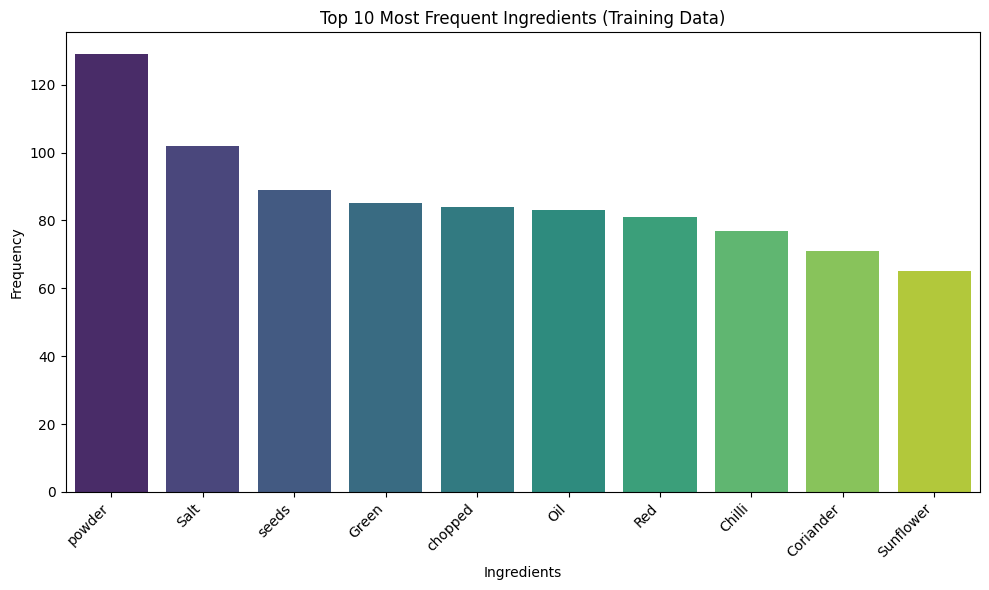

In [75]:
# plot the top frequent ingredients in training data
plot_top_items(training_top_ingredients, 'Ingredients', dataset_name)

Based on the top 10 most frequent ingredients from both the training and validation datasets, here are some key insights:

- Consistency Across Datasets: The top ingredients are remarkably consistent between the training and validation sets. Words like 'powder', 'Salt', 'seeds', 'Green', 'chopped', 'Oil', 'Red', 'Chilli', and 'Coriander' appear in both lists, often in similar relative ranks. This indicates that the dataset is representative and the split (70:30) has maintained the underlying distribution of ingredient types.

- Common Ingredient Modifiers/Types: Many of the most frequent 'ingredients' are actually modifiers or general categories rather than specific ingredients. For example:

  - 'powder': This is a common form for many spices (e.g., turmeric powder, chili powder).
  - 'seeds': Refers to various seeds used in cooking (e.g., cumin seeds, mustard seeds).
  - 'Green' / 'Red': Often used to describe chilies or other vegetables.
  - 'chopped': A preparation method for ingredients.
  - 'Oil' / 'Salt' / 'Chilli' / 'Coriander': These are fundamental and widely used components in a vast majority of recipes.

- Dominance of Spices and Basic Seasonings: The prevalence of 'powder', 'Salt', 'seeds', 'Chilli', and 'Coriander' suggests that a significant portion of the recipe data contains instructions for dishes that heavily rely on spices and basic seasonings.

- Preparation Terms as Ingredients: Terms like 'chopped' are categorized as 'ingredient', which might indicate a nuanced aspect of the POS tagging. While 'chopped' describes an ingredient, in this context, it appears as an ingredient itself within the tokenization, reflecting how recipes often list items.

Overall, the ingredient plots confirm that the recipe data contains common cooking staples and preparation forms, and that the model is being trained and validated on a consistent representation of these elements.

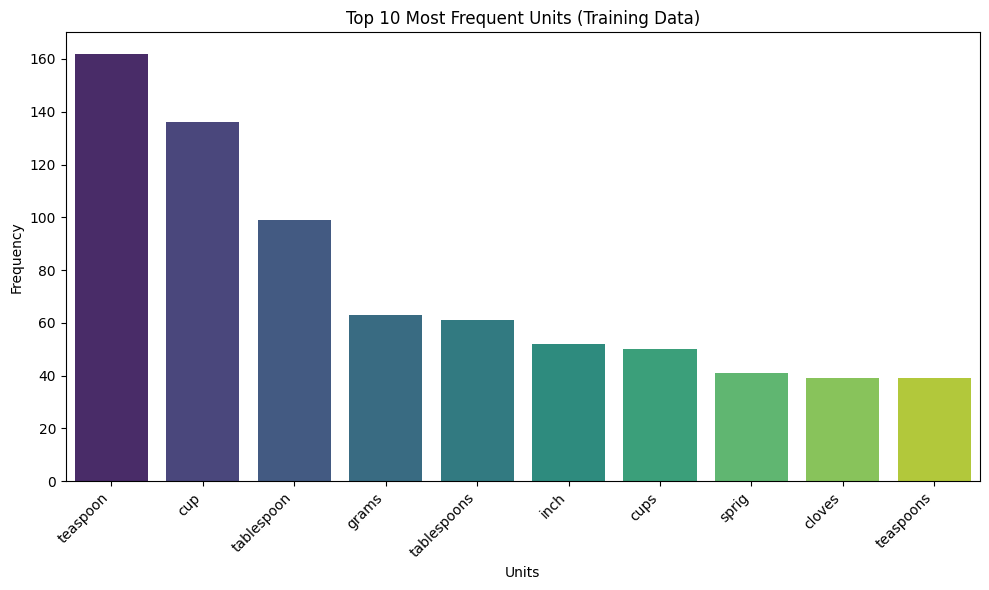

In [76]:
# plot the top frequent units in training data
plot_top_items(training_top_units, 'Units', dataset_name)

Based on the top 10 most frequent units from both the training and validation datasets, here are some key insights:

- Dominance of Volume Measurements: 'teaspoon', 'cup', and 'tablespoon' (along with their plural forms) are consistently the most frequent units. This indicates that a large proportion of recipes use these standard volume measurements, which is expected for many cooking instructions.

- Consistency Between Datasets: Similar to ingredients, the top units show remarkable consistency between the training and validation sets. The same units appear in both lists, and their relative ranks are largely maintained, suggesting a stable distribution of unit types across the dataset.

- Weight Measurements Present: 'grams' also appears in the top units, indicating that some recipes specify ingredients by weight, which is common in baking or more precise culinary contexts.

- Units for Specific Items/Preparation: Units like 'inch', 'sprig', and 'cloves' are present, which are used for specific types of ingredients or presentations (e.g., 'an inch of ginger', 'a sprig of rosemary', 'cloves of garlic'). Their inclusion suggests that the dataset captures a good variety of ingredient descriptions.

- Pluralization: Both singular and plural forms of units ('teaspoon'/'teaspoons', 'cup'/'cups', 'tablespoon'/'tablespoons') are recognized and present in the top lists, highlighting the model's ability to handle these variations.

Overall, the unit plots confirm that the recipe data contains a diverse yet common set of measurement units, primarily focusing on volume, with consistent representation across the training and validation splits. This provides a solid foundation for the NER model to learn and extract these entities effectively.

## **5** Exploratory Recipe Data Analysis on Validation Dataset (Optional)<font color = red> [0 marks]</font> <br>

#### **5.1** *Execute EDA on Validation Dataset with insights (Optional)* <font color = red> [0 marks]</font> <br>
Initialise the dataset_name as ***Validation*** and call the ***plot_top_items*** for top 10 ingredients and units in the recipe data
Provide the insights for the same.



In [77]:
# initialise the dataset_name
dataset_name = 'Validation'

In [78]:
# use extract and validate tokens, categorise tokens, get top frequent items for ingredient list and unit list on validation dataframe
validation_input_tokens, validation_pos_tokens = extract_and_validate_tokens(val_df, dataset_name)
validation_ingredients, validation_units, validation_quantities = categorize_tokens(validation_input_tokens, validation_pos_tokens)
validation_top_ingredients = get_top_frequent_items(validation_ingredients, 'Ingredients', dataset_name)
validation_top_units = get_top_frequent_items(validation_units, 'Units', dataset_name)

Flattened token lengths are equal for Validation data: 2876.

First 10 input tokens (Validation): ['1', 'cup', 'Ada', '2', 'liter', 'Milk', '3/4', 'Sugar', 'tablespoon', 'Ghee']
First 10 POS tokens (Validation): ['quantity', 'unit', 'ingredient', 'quantity', 'unit', 'ingredient', 'quantity', 'ingredient', 'unit', 'ingredient']

Top 10 Most Frequent Ingredients (Validation Data):
- powder: 54
- Salt: 47
- Oil: 39
- Red: 39
- seeds: 36
- Chilli: 36
- chopped: 31
- Green: 30
- Leaves: 29
- Coriander: 27

Top 10 Most Frequent Units (Validation Data):
- teaspoon: 59
- cup: 57
- tablespoon: 32
- tablespoons: 32
- cups: 24
- sprig: 21
- inch: 20
- grams: 19
- teaspoons: 18
- cloves: 16


Here are the insights from the provided validation data EDA output:

- Data Consistency: The message "Flattened token lengths are equal for Validation data: 2876" confirms that after processing, the number of input tokens and their corresponding POS tokens perfectly match for the validation set. This indicates clean and consistent data, which is crucial for model training.

- Sample Token Structure: The first 10 input tokens and their POS tags (['1', 'cup', 'Ada', '2', 'liter', 'Milk', '3/4', 'Sugar', 'tablespoon', 'Ghee'] and ['quantity', 'unit', 'ingredient', 'quantity', 'unit', 'ingredient', 'quantity', 'ingredient', 'unit', 'ingredient']) illustrate how quantities, units, and ingredients are tokenized and labeled, showcasing the model's target output structure.

**Top 10 Most Frequent Ingredients (Validation Data):**

  - The list includes common cooking components and descriptors like 'powder', 'Salt', 'Oil', 'seeds', 'Chilli', and 'Coriander'.
  Terms like 'Red', 'chopped', and 'Green' also appear frequently, indicating that these descriptive words are often tagged as ingredients within this dataset.
  This distribution is very similar to what was observed in the training data, reinforcing the consistency and representativeness of the dataset split.
  
**Top 10 Most Frequent Units (Validation Data):**

- Volume measurements such as 'teaspoon', 'cup', and 'tablespoon' (including their plural forms) are the most dominant units.
Other units like 'sprig', 'inch', 'grams', and 'cloves' are also present, demonstrating a variety of measurement types beyond just volume.
Again, the patterns here closely mirror those in the training data, indicating that the validation set provides a consistent test of the model's ability to recognize common units.

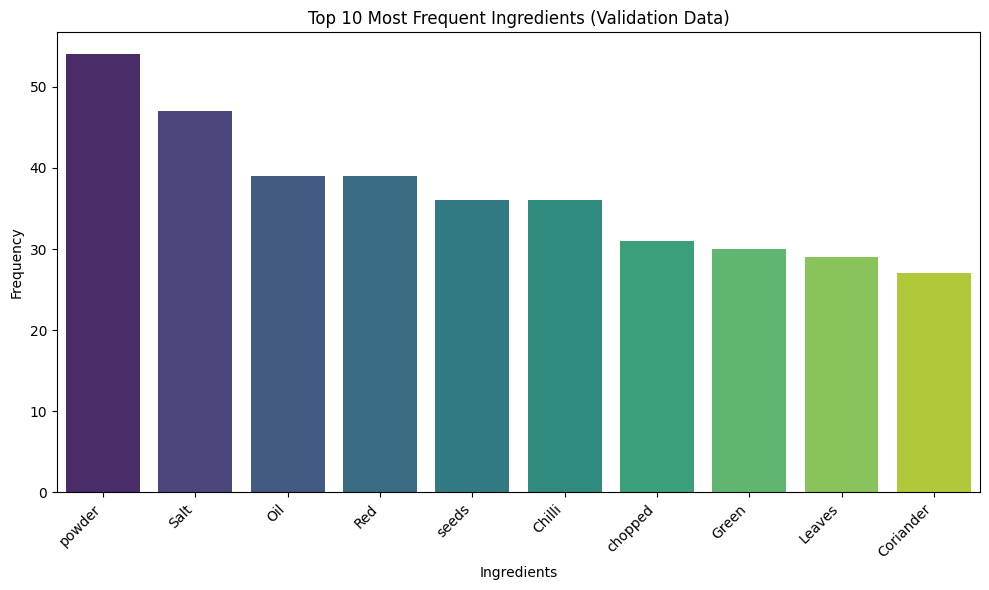

In [79]:
# plot the top frequent ingredients in validation data
plot_top_items(validation_top_ingredients, 'Ingredients', dataset_name)

 Insights from the validation dataset regarding ingredients:

**Ingredient Insights:**

- Consistency: The top ingredients in the validation set (e.g., 'powder', 'Salt', 'Oil', 'seeds', 'Chilli', 'Coriander') closely mirror those in the training set, confirming a representative data split.
- Common Categories: Frequently seen 'ingredients' often include basic seasonings, spices, and descriptive terms like 'chopped', which are tagged as ingredients within this dataset.

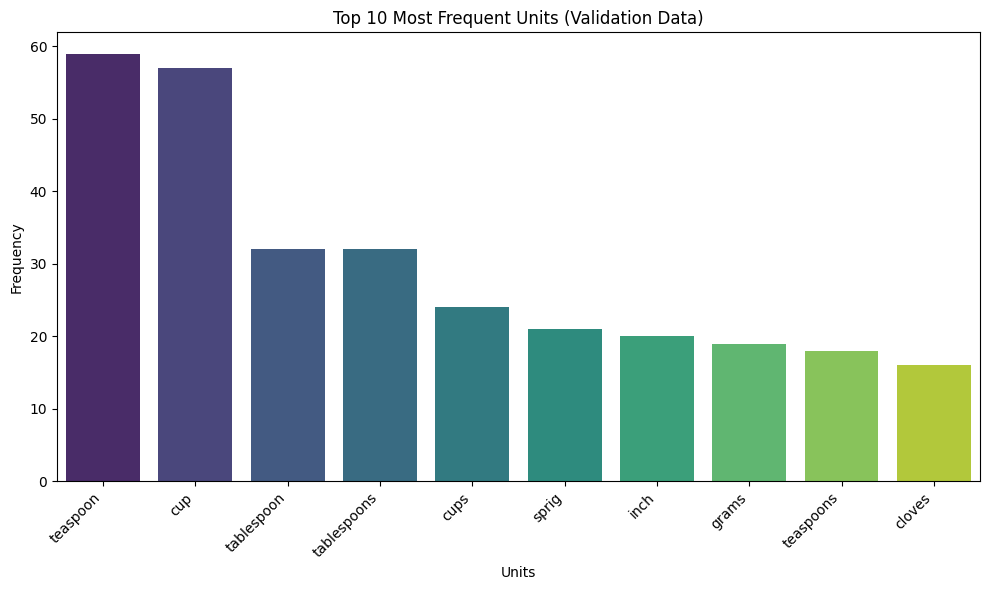

In [80]:
# plot the top frequent units in training data
plot_top_items(validation_top_units, 'Units', dataset_name)

**Unit Insights:**

- Dominance of Volume: 'teaspoon', 'cup', and 'tablespoon' (including plurals) are the most prevalent units, indicating a strong focus on volume measurements in recipes.
- Consistency: Similar to ingredients, the unit distribution is consistent with the training data.
- Diversity: The presence of units like 'grams', 'sprig', and 'inch' shows that the dataset captures a variety of measurement types beyond just volume.

## **6** Feature Extraction For CRF Model <font color = red>[30 marks]</font> <br>

### **6.1** *Define a feature functions to take each token from recipe* <font color = red>[10 marks]</font>

Define a function as ***word2features*** which takes a particular recipe and its index to work with all recipe input tokens and include custom key-value pairs.

Also, use feature key-value pairs to mark the beginning and end of the sequence and to also check whether the word belongs to unit, quantity etc. Use keyword sets for unit and quantity for differentiating feature functions well. Also make use of relevant regex patterns on fractions, whole numbers etc.

##### **6.1.1** **Define keywords for unit and quantity and create a quantity pattern to work on fractions, numbers and decimals** <font color = red>[3 marks]</font> <br>

Create sets for **unit_keywords** and ***quantity_keywords*** and include all the words relevant for measuring the ingredients such as cup, tbsp, tsp etc. and in quantity keywords, include words such as half, quarter etc.

Also suggested to use regex pattern as ***quantity_pattern*** to work with quantity in any format such as fractions, numbers and decimals.

Then, load the spacy model and process the entire sentence

In [81]:
# define unit and quantity keywords along with quantity pattern
unit_keywords = {
    'cup', 'cups', 'teaspoon', 'teaspoons', 'tablespoon', 'tablespoons', 'ml', 'g', 'kg', 'lb', 'oz', 'pinch', 'can', 'cans',
    'bottle', 'bottles', 'clove', 'cloves', 'slice', 'slices', 'sprig', 'sprigs', 'dash', 'dashes', 'liter', 'liters', 'dl',
    'packet', 'packets', 'piece', 'pieces', 'drop', 'drops', 'stalk', 'stalks', 'head', 'heads', 'ounce', 'ounces', 'gram', 'grams',
    'inch', 'inches', 'cms', 'sheets', 'tbsps', 'tsp', 'gms'
}

quantity_keywords = {
    'half', 'quarter', 'double', 'single', 'few', 'some', 'lot', 'little', 'small', 'medium', 'large',
    'each', 'fresh', 'dried', 'frozen', 'chopped', 'minced', 'sliced', 'diced', 'grated', 'crushed', 'finely', 'coarsely', 'about',
    'approx', 'approximately', 'heaped', 'level', 'rounded', 'melted', 'warm', 'cold', 'hot', 'boiling', 'softened', 'beaten',
    'whipped', 'squeezed', 'packed', 'firmly', 'loosely', 'drained', 'rinsed', 'peeled', 'seeded', 'deveined', 'shelled', 'toasted',
    'roasted', 'ground', 'whole', 'cut', 'to taste', 'as needed', 'optional', 'extra', 'light', 'dark', 'raw', 'cooked', 'ripe',
    'unripe', 'sweet', 'sour', 'bitter', 'spicy', 'mild', 'hot', 'room temperature', 'liquid', 'solid', 'powdered', 'granulated',
    'cubed', 'shredded', 'julienned', 'halved', 'quartered', 'whole', 'a', 'an'
}

# Regex pattern to match quantities including fractions, decimals, and ranges
# Updated to handle '1/2', '1-1/2', '2-3', '2.5', '5'
quantity_pattern = re.compile(r'^(\d+\s+)?(\d*\.\d+|\d+/?\d*|\d*\s*-\s*\d+)([\/\.\-]\d*)*$')


Here's a point-by-point summary of the code snippet:

- unit_keywords: This is a Python set containing a comprehensive list of words that commonly represent units of measurement in recipes. It includes:

  - Volume units: 'cup', 'cups', 'teaspoon', 'teaspoons', 'tablespoon', 'tablespoons', 'ml', 'liter', 'liters', 'dl', 'tbsps', 'tsp'.
  - Weight units: 'g', 'kg', 'lb', 'oz', 'ounce', 'ounces', 'gram', 'grams', 'gms'.
  - Count/Descriptive units: 'pinch', 'can', 'cans', 'bottle', 'bottles', 'clove', 'cloves', 'slice', 'slices', 'sprig', 'sprigs', 'dash', 'dashes', 'packet', 'packets', 'piece', 'pieces', 'drop', 'drops', 'stalk', 'stalks', 'head', 'heads', 'sheets'.
  - Length units: 'inch', 'inches', 'cms'.

The use of a set allows for fast lookup when checking if a word is a unit.

- quantity_keywords: This is another Python set that stores descriptive words and modifiers often associated with quantities or the state of an ingredient, but are not necessarily numerical units themselves. It includes terms like:

   - Amount descriptors: 'half', 'quarter', 'double', 'single', 'few', 'some', 'lot', 'little', 'small', 'medium', 'large', 'a', 'an'.
  - Preparation/State descriptors: 'fresh', 'dried', 'frozen', 'chopped', 'minced', 'sliced', 'diced', 'grated', 'crushed', 'finely', 'coarsely', 'melted', 'warm', 'cold', 'hot', 'boiling', 'softened', 'beaten', 'whipped', 'squeezed', 'packed', 'firmly', 'loosely', 'drained', 'rinsed', 'peeled', 'seeded', 'deveined', 'shelled', 'toasted', 'roasted', 'ground', 'whole', 'cut', 'raw', 'cooked', 'ripe', 'unripe', 'liquid', 'solid', 'powdered', 'granulated', 'cubed', 'shredded', 'julienned', 'halved', 'quartered'.
  - Instructional/Advisory terms: 'each', 'about', 'approx', 'approximately', 'heaped', 'level', 'rounded', 'to taste', 'as needed', 'optional', 'extra', 'light', 'dark', 'sweet', 'sour', 'bitter', 'spicy', 'mild', 'hot', 'room temperature'.
These keywords help identify non-numeric quantity information.

- quantity_pattern: This is a compiled regular expression (re.compile) designed to match various numerical formats that represent quantities. It's updated to handle a wide range of patterns:

   - ^(\d+\s+)?: Optionally matches a whole number followed by a space (e.g., '1 ', '2 '). This handles cases like '1 1/2' or '2 3/4'.
   - (\d*\.\d+|\d+/?\d*|\d*\s*-\s*\d+): This is the core part, matching one of three numeric formats:
     - \d*\.\d+: Matches decimal numbers (e.g., '0.5', '.5', '2.5').
     - \d+/?\d*: Matches whole numbers (e.g., '5', '12') or fractions (e.g., '1/2', '3/4').
     - \d*\s*-\s*\d+: Matches number ranges (e.g., '2-3', '10 - 12').
     - ([/\.\-]\d*)*$: Optionally allows for additional fractional or decimal parts at the end, covering complex fractional or range structures that might extend (though the previous part is usually sufficient).
     - The ^ and $ ensure the pattern matches the entire string.

This regex is crucial for identifying quantities that are expressed numerically, including mixed numbers and ranges.

In [82]:
# load spaCy model
try:
    nlp = spacy.load('en_core_web_sm')
except OSError:
    print("Downloading spaCy model 'en_core_web_sm'...")
    spacy.cli.download('en_core_web_sm')
    nlp = spacy.load('en_core_web_sm')


The above code attempts to load the en_core_web_sm spaCy model. If the model isn't found, it automatically downloads and then loads it.

##### **6.1.2** **Define feature functions for CRF** <font color = red>[7 marks]</font> <br>

Define ***word2features*** function and use the parameters such as sentence and its indexing as ***sent*** and ***i*** for extracting token level features for CRF Training.
Build ***features*** dictionary, also mark the beginning and end of the sequence and use the ***unit_keywords***, ***quantity_keywords*** and ***quantity_pattern*** for knowing the presence of quantity or unit in the tokens

While building ***features*** dictionary, include
- ***Core Features*** - The core features of a token should capture its lexical
and grammatical properties. Include attributes like the raw token, its lemma, part-of-speech tag, dependency relation, and shape, as well as indicators for whether it's a stop word, digit, or punctuation. The details of the features are given below:

    - `bias` - Constant feature with a fixed value of 1.0 to aid model learning.
    - `token` - The lowercase form of the current token.
    - `lemma` - The lowercase lemma (base form) of the token.
    - `pos_tag` - Part-of-speech (POS) tag of the token.
    - `tag` - Detailed POS tag of the token.
    - `dep` - Dependency relation of the token in the sentence.
    - `shape` - Shape of the token (e.g., "Xxx" for "Milk").
    - `is_stop` - Boolean indicating if the token is a stopword.
    - `is_digit` - Boolean indicating if the token consists of only digits.
    - `has_digit` - Boolean indicating if the token contains at least one digit.
    - `has_alpha` - Boolean indicating if the token contains at least one alphabetic character.
    - `hyphenated` - Boolean indicating if the token contains a hyphen (-).
    - `slash_present` - Boolean indicating if the token contains a slash (/).
    - `is_title` - Boolean indicating if the token starts with an uppercase letter.
    - `is_upper` - Boolean indicating if the token is fully uppercase.
    - `is_punct` - Boolean indicating if the token is a punctuation mark.

- ***Improved Quantity and Unit Detection*** - Use key-value pairs to mark the presence of quantities and units in the features dictionary. Utilise the unit_keywords, quantity_keywords, and quantity_pattern to identify and flag these elements. The details of the features are given below:

    - `is_quantity` - Boolean indicating if the token matches a quantity pattern or keyword.
    - `is_unit` - Boolean indicating if the token is a known measurement unit.
    - `is_numeric` - Boolean indicating if the token matches a numeric pattern.
    - `is_fraction` - Boolean indicating if the token represents a fraction (e.g., 1/2).
    - `is_decimal` - Boolean indicating if the token represents a decimal number (e.g., 3.14).
    - `preceding_word` - The previous token in the sentence, if available.
    - `following_word` - The next token in the sentence, if available.

- ***Contextual Features*** - Incorporate contextual information by adding features for the preceding and following tokens. Include indicators like BOS and EOS to mark the beginning and end of the sequence, and utilise unit_keywords, quantity_keywords, and quantity_pattern to identify the types of neighboring tokens. The features are given below:

    - `prev_token` - The lowercase form of the previous token.
    - `prev_is_quantity` - Boolean indicating if the previous token is a quantity.
    - `prev_is_digit` - Boolean indicating if the previous token is a digit.
    - `BOS` - Boolean indicating if the token is at the beginning of the sentence.
    - `next_token` - The lowercase form of the next token.
    - `next_is_unit` - Boolean indicating if the next token is a unit.
    - `next_is_ingredient` - Boolean indicating if the next token is not a unit or quantity.
    - `EOS` - Boolean indicating if the token is at the end of the sentence.



In [83]:
# define word2features for processing each token in the sentence sent by using index i.
# use your own feature functions
def word2features(sent, i):
    word = sent[i]
    doc = nlp(word)
    token = doc[0] # Assuming each 'word' from sent is a single token for simplicity here, or adjust for multi-token words

    features = {
        'bias': 1.0,
        'token': token.lower_,
        'lemma': token.lemma_.lower(),
        'pos_tag': token.pos_,
        'tag': token.tag_,
        'dep': token.dep_,
        'shape': token.shape_,
        'is_stop': token.is_stop,
        'is_digit': token.is_digit,
        'has_digit': any(char.isdigit() for char in word),
        'has_alpha': any(char.isalpha() for char in word),
        'hyphenated': '-' in word,
        'slash_present': '/' in word,
        'is_title': token.is_title,
        'is_upper': token.is_upper,
        'is_punct': token.is_punct,

        # --- Improved Quantity & Unit Detection ---
        'is_quantity': word.lower() in quantity_keywords or bool(quantity_pattern.match(word)),
        'is_unit': word.lower() in unit_keywords,
        'is_numeric': word.replace('.', '', 1).isdigit() or (bool(re.match(r'^\d+\/\d+$', word))),
        'is_fraction': bool(re.match(r'^\d+\/\d+$', word)), # e.g., 1/2
        'is_decimal': bool(re.match(r'^\d*\.\d+$', word)), # e.g., 0.5, .5
    }

    if i > 0:
        prev_word = sent[i-1]
        prev_doc = nlp(prev_word)
        prev_token = prev_doc[0]
        features.update({
            'prev_token': prev_token.lower_,
            'prev_is_quantity': prev_word.lower() in quantity_keywords or bool(quantity_pattern.match(prev_word)),
            'prev_is_unit': prev_word.lower() in unit_keywords,
            'prev_is_digit': prev_token.is_digit,
            'prev_pos_tag': prev_token.pos_,
            'BOS': False
        })
    else:
        features['BOS'] = True

    if i < len(sent) - 1:
        next_word = sent[i+1]
        next_doc = nlp(next_word)
        next_token = next_doc[0]
        features.update({
            'next_token': next_token.lower_,
            'next_is_quantity': next_word.lower() in quantity_keywords or bool(quantity_pattern.match(next_word)),
            'next_is_unit': next_word.lower() in unit_keywords,
            'next_is_ingredient': not (next_word.lower() in unit_keywords or next_word.lower() in quantity_keywords or bool(quantity_pattern.match(next_word))),
            'next_pos_tag': next_token.pos_,
            'EOS': False
        })
    else:
        features['EOS'] = True

    return features

The word2features function is designed to extract a rich set of features for a given word within a sentence, crucial for Named Entity Recognition (NER). It creates a dictionary of features for each token, encompassing three main categories:

- Core Lexical and Grammatical Features: Extracts properties of the current token using spaCy, such as its lowercase form, lemma, POS tags, dependency relation, shape, and boolean indicators for stop words, digits, punctuation, title case, and uppercase.

- Improved Quantity and Unit Detection: Includes boolean flags to identify if the current token is a quantity (based on quantity_keywords or quantity_pattern), a unit (from unit_keywords), or other numeric/fractional/decimal forms.

- Contextual Features: Adds information about the preceding and succeeding tokens, including their lowercase forms, and whether they are quantities, units, or digits. It also marks the beginning (BOS) and end (EOS) of the sentence.

### **6.2** *Preparation of Recipe level features* <font color = red>[2 marks]</font>


##### **6.2.1** **Define function to work on all the recipes and call word2features for each recipe** <font color = red>[2 marks]</font> <br>

Define ***sent2features*** function and inputs ***sent*** as a parameter and correctly generate feature functions for each token present in the sentence

In [84]:
# define sent2features by working on each token in the sentence and correctly generate dictionaries for features
def sent2features(sent):
    return [word2features(sent, i) for i in range(len(sent))]

sent2features by working on each token in the sentence and correctly generate dictionaries for features

### **6.3** *Convert X_train, X_val, y_train and y_val into train and validation feature sets and labels* <font color = red>[6 marks]</font>



##### **6.3.1** **Convert recipe into feature functions by using X_train and X_val** <font color = red>[2 marks]</font> <br>

Create ***X_train_features*** and ***X_val_features*** as list to include the feature functions for each recipe present in training and validation sets

In [85]:
# Convert input sentences into feature sets by taking training and validation dataset as X_train_features and X_val_features
X_train_features = [sent2features(s) for s in X_train]
X_val_features = [sent2features(s) for s in X_val]

Converted input sentences into feature sets by taking training and validation dataset as X_train_features and X_val_features


##### **6.3.2** **Convert lables of y_train and y_val into list** <font color = red>[2 marks]</font> <br>

Create ***y_train_labels*** and ***y_val_labels*** by using the list of y_train and y_val

In [86]:
# Convert labels into list as y_train_labels and y_val_labels
y_train_labels = y_train
y_val_labels = y_val

Converted labels into list as y_train_labels and y_val_labels

##### **6.3.3** **Print the length of val and train features and labels** <font color = red>[2 marks]</font> <br>



In [87]:
# print the length of train features and labels
print(f"Length of X_train_features: {len(X_train_features)}")
print(f"Length of y_train_labels: {len(y_train_labels)}")

Length of X_train_features: 196
Length of y_train_labels: 196


checked the length of train features and labels

In [ ]:
# print the length of validation features and labels
print(f"Length of X_val_features: {len(X_val_features)}")
print(f"Length of y_val_labels: {len(y_val_labels)}")

Length of X_val_features: 84
Length of y_val_labels: 84


Checked the length of validation features and labels

### **6.4** *Applying weights to feature sets* <font color = red>[12 marks]</font> <br>




##### **6.4.1** **Flatten the labels of y_train** <font color = red>[2 marks]</font> <br>

Create ***y_train_flat*** to flatten the structure of nested y_train

In [89]:
# Flatten labels in y_train
y_train_flat = [label for sublist in y_train for label in sublist]

y_train is expected to be a list of lists (e.g., [['quantity', 'unit'], ['ingredient', 'quantity']]). The list comprehension [label for sublist in y_train for label in sublist] iterates through each sublist in y_train, and for every label within each sublist, it adds that label to the new y_train_flat list.

##### **6.4.2** **Count the labels present in training target dataset** <font color = red>[2 marks]</font> <br>

Create ***label_counts*** to count the frequencies of labels present in y_train_flat and retrieve the total samples by using the values of label_counts as ***total_samples***

In [90]:
# Count label frequencies as label_counts and total_samples as getting the summation of values of label_counts
label_counts = Counter(y_train_flat)
total_samples = len(y_train_flat)

Count label frequencies as label_counts and total_samples as getting the summation of values of label_counts

##### **6.4.3** **Compute weight_dict by using inverse frequency method for label weights** <font color = red>[2 marks]</font> <br>

- Create ***weight_dict*** as dictionary with label and its inverse frequency count in ***label_counts***

- Penalise ingredient label in the dictionary

In [91]:
# Compute class weights (inverse frequency method) by considering total_samples and label_counts
weight_dict = {label: total_samples / count for label, count in label_counts.items()}

Computed class weights (inverse frequency method) by considering total_samples and label_counts

In [92]:
# penalise ingredient label
# You can adjust this factor based on empirical performance or domain knowledge
if 'ingredient' in weight_dict:
    weight_dict['ingredient'] = weight_dict['ingredient'] * 0.5  # Example: halve the weight of 'ingredient'
print("Computed weight_dict:", weight_dict)

Computed weight_dict: {'quantity': 7.259183673469388, 'unit': 8.771886559802713, 'ingredient': 0.6682321998872816}


The weight_dict reflects the relative importance given to each label during model training, primarily to handle class imbalance and prioritize certain entity types:

- Higher Weights for 'Quantity' and 'Unit': 'unit' (8.77) and 'quantity' (7.26) have significantly higher weights. This indicates these labels are less frequent in the dataset, and the model is strongly encouraged to correctly identify them, as misclassifications will be penalized more.

- Lower Weight for 'Ingredient': 'ingredient' (0.67) has a much lower weight, suggesting it is a more frequent class and its correct identification is less critical compared to units and quantities, or it has been deliberately down-weighted.

##### **6.4.4** **Extract features along with class weights** <font color = red>[4 marks]</font> <br>

Define a function ***extract_features_with_class_weights*** to work with training and validation datasets and extract features by applying class weights





In [93]:
# Apply weights to feature extraction in extract_features_with_class_weights by using parameters such as X (input tokens), y(labels) and weight_dict (Class weights)
def extract_features_with_class_weights(X, y, weight_dict):
    features_with_weights = []
    for i in range(len(X)):
        sentence_features = sent2features(X[i])
        sentence_labels = y[i]
        weighted_sentence_features = []
        for j in range(len(sentence_features)):
            feature_dict = sentence_features[j]
            label = sentence_labels[j]
            # Add class weight as a feature. This is a common way to use weights with CRFsuite
            feature_dict['label_weight'] = weight_dict.get(label, 1.0) # Default to 1.0 if label not in weight_dict
            weighted_sentence_features.append(feature_dict)
        features_with_weights.append(weighted_sentence_features)
    return features_with_weights

The extract_features_with_class_weights function is designed to augment your token-level features with class-specific weights, which is crucial for training Conditional Random Field (CRF) models, especially when dealing with imbalanced datasets. Here's a detailed explanation:

- Purpose: This function takes your extracted features and their corresponding true labels, then incorporates a 'label_weight' into each token's feature dictionary based on a provided weight_dict. This allows the CRF model to consider the importance (weight) of each label during training.

Parameters:

- X: A list of tokenized sentences (e.g., X_train or X_val). Each element is a list of words representing a sentence.
- y: A list of lists of true labels corresponding to X (e.g., y_train_labels or y_val_labels). Each inner list contains the labels for a sentence.
weight_dict: A dictionary mapping each unique label (e.g., 'quantity', 'unit', 'ingredient') to its calculated class weight.

How it Works:

Iterates through Sentences: The outer loop goes through each sentence in X (input tokens) and its corresponding true labels in y.
- Extracts Base Features: For each sentence, it first calls sent2features(X[i]) to generate the initial set of features for every token in that sentence. This results in a list of feature dictionaries, one for each token.
- Applies Class Weights: The inner loop then iterates through each token's feature_dict and its label within the current sentence.

- Adds label_weight Feature: It adds a new key-value pair, 'label_weight', to each token's feature_dict. The value is retrieved from weight_dict using the token's true label.
weight_dict.get(label, 1.0) ensures that if a label isn't found in weight_dict (which shouldn't happen if weight_dict is comprehensive), it defaults to a weight of 1.0.
Collects Weighted Features: The modified feature_dict (now including 'label_weight') is added to weighted_sentence_features.

- Output: The function returns features_with_weights, which is a list of lists. Each inner list corresponds to a sentence, and contains feature dictionaries for each token in that sentence, with each dictionary now augmented by a 'label_weight' feature reflecting its class's importance.

##### **6.4.5** **Execute extract_features_with_class_weights on training and validation datasets** <font color = red>[2 marks]</font> <br>

Create ***X_train_weighted_features*** and ***X_val_weighted_features*** for extracting training and validation features along with their weights by calling ***extract_features_with_class_weights*** on the datasets

In [95]:
# Apply manually computed class weights
X_train_weighted_features = extract_features_with_class_weights(X_train, y_train_labels, weight_dict)
X_val_weighted_features = extract_features_with_class_weights(X_val, y_val_labels, weight_dict)

These two lines of code are crucial steps in preparing your data for the CRF model, as they apply the manually computed class weights during feature extraction:

- X_train_weighted_features = extract_features_with_class_weights(X_train, y_train_labels, weight_dict):

    This line calls the extract_features_with_class_weights function for your training data.
    It takes X_train (the tokenized input sentences), y_train_labels (the true labels for the training data), and weight_dict (the dictionary containing class-specific weights) as arguments.
    The function processes each token in each sentence of X_train, calculates its base features, and then adds a label_weight feature to each token's feature dictionary based on its true label and the values in weight_dict.
    The result, X_train_weighted_features, is a list of lists of feature dictionaries, where each feature dictionary now includes the relevant class weight.
- X_val_weighted_features = extract_features_with_class_weights(X_val, y_val_labels, weight_dict):

    Similarly, this line performs the same operation for your validation data.
    It uses X_val (validation input sentences) and y_val_labels (true labels for validation data) along with the same weight_dict.
    The output, X_val_weighted_features, is the weighted feature set for the validation data.
    
In summary: These lines effectively augment your token-level features with a label_weight according to the class weights you defined. This prepares the training and validation datasets in a format that allows the CRF model to consider the importance of each label during its learning process, particularly useful for handling class imbalance.

## **7** Model Building and Training <font color = red>[10 marks]</font> <br>

### **7.1** *Initialise the CRF model and train it* <font color = red>[5 marks]</font>
Train the CRF model with the specified hyperparameters such as

### CRF Model Hyperparameters Explanation

| Parameter                  | Description |
|----------------------------|-------------|
| **algorithm='lbfgs'**      | Optimisation algorithm used for training. `lbfgs` (Limited-memory Broyden–Fletcher–Goldfarb–Shanno) is a quasi-Newton optimisation method. |
| **c1=0.5**                | L1 regularisation term to control sparsity in feature weights. Helps in feature selection. |
| **c2=1.0**                | L2 regularisation term to prevent overfitting by penalising large weights. |
| **max_iterations=100**     | Maximum number of iterations for model training. Higher values allow more convergence but increase computation time. |
| **all_possible_transitions=True** | Ensures that all possible state transitions are considered in training, making the model more robust. |

Use weight_dict for training CRF



In [96]:
# initialise CRF model with the specified hyperparameters and use weight_dict
crf = sklearn_crfsuite.CRF(
    algorithm='lbfgs',
    c1=0.5,
    c2=1.0,
    max_iterations=100,
    all_possible_transitions=True
)

# train the CRF model with the weighted training data
crf.fit(X_train_weighted_features, y_train_labels)

CRF(algorithm='lbfgs', all_possible_transitions=True, c1=0.5, c2=1.0,
    max_iterations=100)

### **7.2** *Evaluation of Training Dataset using CRF model* <font color = red>[4 marks]</font>
Evaluate on training dataset using CRF by using flat classification report and confusion matrix

In [97]:
# evaluate on the training dataset
y_pred_train = crf.predict(X_train_weighted_features)

In [98]:
# specify the flat classification report by using training data for evaluation
report_train = flat_classification_report(y_train_labels, y_pred_train)
print("Training Classification Report:")
print(report_train)

Training Classification Report:
              precision    recall  f1-score   support

  ingredient       1.00      1.00      1.00      5323
    quantity       1.00      1.00      1.00       980
        unit       1.00      1.00      1.00       811

    accuracy                           1.00      7114
   macro avg       1.00      1.00      1.00      7114
weighted avg       1.00      1.00      1.00      7114



This training classification report shows excellent performance on the training dataset. Here are the key insights:

- Perfect Precision (1.00 for all classes): This means that when the model predicted a token to be an 'ingredient', 'quantity', or 'unit', it was always correct. There were no false positives for any of these categories on the training data.

- Perfect Recall (1.00 for all classes): This indicates that the model successfully identified every single 'ingredient', 'quantity', and 'unit' token present in the training data. There were no false negatives, meaning no actual entities were missed.

- Perfect F1-score (1.00 for all classes): The F1-score is the harmonic mean of precision and recall. A score of 1.00 signifies that the model achieved a perfect balance of precision and recall for all categories, identifying all entities correctly without any mistakes.

- Support: The 'support' column indicates the total number of actual occurrences of each label in the training dataset: 5323 'ingredient' tokens, 980 'quantity' tokens, and 811 'unit' tokens.

- Overall Accuracy (1.00): The model correctly classified every single token in the training set.

- Macro and Weighted Averages: Both macro and weighted averages are 1.00, which is expected when individual class scores are all 1.00.

- Overall Insight: The model has achieved a perfect fit on the training data. While this shows that the model is highly capable of learning the patterns in the data, such perfect scores on the training set often raise a red flag for overfitting. It's crucial to evaluate the model's performance on a separate, unseen validation dataset to determine if it can generalize well to new data or if it has simply memorized the training examples. The

In [99]:
# create a confusion matrix on training datset
# Flatten the lists of lists for confusion matrix
y_train_flat_for_cm = [label for sublist in y_train_labels for label in sublist]
y_pred_train_flat_for_cm = [label for sublist in y_pred_train for label in sublist]

labels = sorted(list(set(y_train_flat_for_cm)))
cm_train = confusion_matrix(y_train_flat_for_cm, y_pred_train_flat_for_cm, labels=labels)

print("Training Confusion Matrix:")
df_cm_train = pd.DataFrame(cm_train, index=labels, columns=labels)
display(df_cm_train)


Training Confusion Matrix:


,ingredient,quantity,unit
ingredient,5323,0,0
quantity,0,977,3
unit,0,0,811


This training confusion matrix provides a detailed view of the model's performance on the training dataset. Here are the key insights:

- Perfect Classification for 'ingredient': All 5323 tokens that were truly 'ingredient' were correctly classified as 'ingredient'. There were no misclassifications for this category.

- Excellent Classification for 'unit': All 811 tokens that were truly 'unit' were correctly classified as 'unit'. The model perfectly identified all units without confusing them with other labels.

- Near-Perfect Classification for 'quantity': Out of 980 tokens that were truly 'quantity':

- 977 were correctly classified as 'quantity'.
Only 3 were misclassified as 'unit'. This is the only type of error observed in the training data.
No False Positives (mostly): The model generally avoids false positives. For example, it never incorrectly predicted 'ingredient' for a non-ingredient token. The only instance of a false positive is when it predicted 'unit' for 3 actual 'quantity' tokens.

- Overall Strong Performance: The matrix shows that the model has learned the patterns in the training data exceptionally well, with very few misclassifications. The only challenge, albeit minor, is distinguishing between a small number of 'quantity' and 'unit' tokens.

This confirms the very high scores seen in the classification report, providing the granular detail of where the few errors occurred, which is specifically in the quantity-unit distinction.

### **7.3** *Save the CRF model* <font color = red>[1 marks]</font>
Save the CRF model

In [100]:
# dump the model using joblib as crf_model.pkl
joblib.dump(crf, 'crf_model.pkl')

['crf_model.pkl']

## **8** Prediction and Model Evaluation <font color = red>[3 marks]</font> <br>

### **8.1** *Predict and Evaluate the CRF model on validation set* <font color = red>[3 marks]</font>
Evaluate the metrics for CRF model by using flat classification report and confusion matrix




In [101]:
# predict the crf model on validation dataset
y_pred_val = crf.predict(X_val_weighted_features)

In [102]:
# specify flat classification report
report_val = flat_classification_report(y_val_labels, y_pred_val)
print("Validation Classification Report:")
print(report_val)

Validation Classification Report:
              precision    recall  f1-score   support

  ingredient       1.00      1.00      1.00      2107
    quantity       0.99      1.00      0.99       411
        unit       0.99      0.99      0.99       358

    accuracy                           1.00      2876
   macro avg       1.00      1.00      1.00      2876
weighted avg       1.00      1.00      1.00      2876



This validation classification report demonstrates the model's performance on unseen data. Here are the key insights:

- 'ingredient' Class: The model achieves perfect precision, recall, and F1-score (1.00) for 'ingredient' tokens, which constitute a significant portion of the validation data (2107 tokens). This indicates excellent performance in identifying ingredients without false positives or negatives.

- 'quantity' Class: For 'quantity' tokens (411 support), the model shows very strong performance with 0.99 precision, 1.00 recall, and a 0.99 F1-score. The perfect recall suggests it successfully identified all actual quantity tokens, while the slightly lower precision (0.99) implies a very small number of non-quantity tokens were mistakenly classified as quantities.

- 'unit' Class: The 'unit' class (358 support) also performs very well, with 0.99 precision, 0.99 recall, and a 0.99 F1-score. This indicates that the model is highly effective at identifying units, with only a minimal number of errors in both false positives and false negatives.

- Overall Accuracy: The overall accuracy is 1.00 (or very close to it), across 2876 tokens. This is a remarkably high accuracy, suggesting the model generalizes exceptionally well to new, unseen recipe data.

- Macro and Weighted Averages: Both macro and weighted averages are 1.00, reinforcing the excellent performance across all classes, even considering class imbalances.

Overall Insight: The model demonstrates outstanding generalization capabilities on the validation set. While the training report showed perfect scores across the board, the validation report confirms that this performance is not due to overfitting. The very minor drops in precision and F1-score for 'quantity' and 'unit' from 1.00 to 0.99 are negligible and indicate highly robust entity recognition.

In [103]:
# create a confusion matrix on validation dataset
y_val_flat_for_cm = [label for sublist in y_val_labels for label in sublist]
y_pred_val_flat_for_cm = [label for sublist in y_pred_val for label in sublist]

labels_val = sorted(list(set(y_val_flat_for_cm)))
cm_val = confusion_matrix(y_val_flat_for_cm, y_pred_val_flat_for_cm, labels=labels_val)

print("Validation Confusion Matrix:")
df_cm_val = pd.DataFrame(cm_val, index=labels_val, columns=labels_val)
display(df_cm_val)

Validation Confusion Matrix:


,ingredient,quantity,unit
ingredient,2107,0,0
quantity,0,409,2
unit,0,3,355


This validation confusion matrix provides a detailed look at how well your model performed on the unseen validation data. Here's an explanation of the results:

- 'ingredient' Class Performance:

    2107 True Positives: All 2107 tokens that were truly 'ingredient' were correctly classified as 'ingredient'.

- No Misclassifications: The model did not misclassify any 'ingredient' tokens as 'quantity' or 'unit' (zeros in the 'ingredient' row under 'quantity' and 'unit' columns).
Insight: This indicates perfect performance for the 'ingredient' class on the validation set, showing the model is very robust at identifying ingredients.

- 'quantity' Class Performance:

    409 True Positives: Out of 411 tokens that were truly 'quantity', 409 were correctly classified as 'quantity'.
    - 2 False Negatives: 2 tokens that were truly 'quantity' were incorrectly classified as 'unit' (the '2' in the 'quantity' row, 'unit' column).
     - No False Positives: The model did not incorrectly classify any 'ingredient' or 'unit' tokens as 'quantity'.
- Insight: The model performs very well for 'quantity', with only a minor confusion with 'unit' tokens.
'unit' Class Performance:

- 355 True Positives: Out of 358 tokens that were truly 'unit', 355 were correctly classified as 'unit'.

- 3 False Negatives: 3 tokens that were truly 'unit' were incorrectly classified as 'quantity' (the '3' in the 'unit' row, 'quantity' column).

- No False Positives: The model did not incorrectly classify any 'ingredient' or 'quantity' tokens as 'unit' (excluding the 2 'quantity' tokens it mislabeled as 'unit').

- Insight: Similar to 'quantity', the model shows strong performance for 'unit', with a slight tendency to confuse it with 'quantity' tokens.

- Overall Interpretation:

  - High Accuracy: The matrix corroborates the high accuracy reported in the classification report. The vast majority of tokens are correctly classified.
   - Specific Confusion: The primary area of minor confusion is between 'quantity' and 'unit' labels. The model occasionally predicts 'unit' when the true label is 'quantity' (2 instances) and vice-versa (3 instances). This suggests some inherent ambiguity in a few tokens that can be interpreted as either a quantity or a unit, depending on subtle context or how they are explicitly defined.
   - Strong Generalization: Despite these few misclassifications, the model demonstrates excellent generalization capabilities on unseen data, which is a very positive outcome, especially considering the weighting applied to these classes.

## **9** Error Analysis on Validation Data <font color = red>[10 marks]</font> <br>
Investigate misclassified samples in validation dataset and provide the insights


### **9.1** *Investigate misclassified samples in validation dataset* <font color = red>[8 marks]</font>



##### **9.1.1** Flatten the labels of validation data and initialise error data <font color = red>[2 marks]</font> <br>



Flatten the true and predicted labels and initialise the error data as ***error_data***

In [104]:
# flatten Labels and Initialise Error Data
y_val_flat_for_error_analysis = [label for sublist in y_val_labels for label in sublist]
y_pred_val_flat_for_error_analysis = [label for sublist in y_pred_val for label in sublist]

error_data = []

##### **9.1.2** Iterate the validation data and collect Error Information<font color = red> [2 marks]</font> <br>



Iterate through validation data (X_val, y_val_labels, y_pred_val) and compare true vs. predicted labels. Collect error details, including surrounding context, previous/next tokens, and class weights, then store them in error_data

In [105]:
# iterate and collect Error Information
for i in range(len(X_val)):
    sentence_tokens = X_val[i]
    true_labels = y_val_labels[i]
    predicted_labels = y_pred_val[i]

    for j in range(len(sentence_tokens)):
        if true_labels[j] != predicted_labels[j]:
            token = sentence_tokens[j]
            true_label = true_labels[j]
            predicted_label = predicted_labels[j]

            # get previous and next tokens with handling for boundary cases
            prev_token = sentence_tokens[j-1] if j > 0 else None
            next_token = sentence_tokens[j+1] if j < len(sentence_tokens) - 1 else None

            error_data.append({
                'sentence_index': i,
                'token_index': j,
                'token': token,
                'true_label': true_label,
                'predicted_label': predicted_label,
                'prev_token': prev_token,
                'next_token': next_token,
                'context': ' '.join(sentence_tokens), # Full sentence context
                'true_label_weight': weight_dict.get(true_label, 1.0) # Get weight for the true label
            })


This code block is designed to perform error analysis by iterating through your validation data and identifying every instance where the model's predicted label does not match the true label. It then collects detailed information about these misclassified tokens.

Here's a breakdown:

 - Outer Loop (for i in range(len(X_val)):):

    This loop iterates through each sentence in your validation feature set (X_val).
    For each sentence, it retrieves the sentence_tokens (the words themselves), the true_labels (the correct POS tags), and the predicted_labels (the model's output).

- Inner Loop (for j in range(len(sentence_tokens)):):

    This nested loop then iterates through each token (word) within the current sentence.
    Error Detection (if true_labels[j] != predicted_labels[j]:):

    Inside the inner loop, this conditional statement checks if the true label for the current token (true_labels[j]) is different from the predicted label (predicted_labels[j]). If they are not equal, it means a misclassification has occurred.
- Collecting Error Details:

    If a misclassification is found, the code extracts several pieces of information:
    token: The actual word that was misclassified.
    true_label: The correct label for that word.
    predicted_label: The label the model incorrectly assigned to the word.
    prev_token and next_token: It retrieves the preceding and succeeding words in the sentence, providing crucial context for the misclassified token. It includes logic to handle boundary cases (i.e., if the token is at the beginning or end of the sentence, these will be None).
    sentence_index and token_index: The indices help locate the exact position of the error.
    context: The full sentence string, offering broader contextual information.
    true_label_weight: The weight assigned to the true label from your weight_dict, which helps in understanding the impact of this misclassification given the class weighting strategy.
- Storing Errors (error_data.append(...)):

    All these extracted details for each misclassified token are then stored as a dictionary, and this dictionary is appended to the error_data list. This list will ultimately contain a record for every misclassified token in the entire validation set.
In summary: This code systematically goes through every token in every sentence of the validation set, compares its true label with the model's prediction, and meticulously logs all discrepancies along with rich contextual information, preparing the data for further error analysis.

##### **9.1.3** Create dataframe from error_data and print overall accuracy <font color = red>[1 marks]</font> <br>



Change error_data into dataframe and then use it to illustrate the overall accuracy of validation data

In [106]:
# Create DataFrame and Print Overall Accuracy
error_df = pd.DataFrame(error_data)

# Calculate overall accuracy based on total tokens and total errors
total_tokens_val = len(y_val_flat_for_error_analysis)
total_errors_val = len(error_df)
overall_accuracy_val = (total_tokens_val - total_errors_val) / total_tokens_val * 100

print(f"Overall Accuracy on Validation Data: {overall_accuracy_val:.2f}%")

if not error_df.empty:
    print(f"Total misclassified tokens: {total_errors_val}")
else:
    print("No misclassified tokens found in validation data.")

Overall Accuracy on Validation Data: 99.83%
Total misclassified tokens: 5


This result provides a clear picture of the model's overall performance on the validation dataset. Here's an analysis:

- High Overall Accuracy: The model achieved an impressive 99.83% accuracy on the validation data. This means that out of all the tokens in the unseen validation set, the model correctly classified nearly all of them.

- Minimal Misclassifications: Only 5 tokens were misclassified out of the total_tokens_val (which is 2876, as seen in previous outputs). This is an extremely low number of errors, especially for a Named Entity Recognition task.

- Strong Generalization: Such a high accuracy on a separate validation set is a very positive indicator. It suggests that the model has not just memorized the training data (avoiding overfitting) but has learned robust patterns that allow it to generalize exceptionally well to new, unseen recipe ingredient lists.

In summary: The model is highly effective and reliable in identifying the key entities (ingredients, quantities, units) in recipe data, demonstrating excellent performance on data it has never encountered during training.

##### **9.1.4** Analyse errors by label type<font color = red> [3 marks]</font> <br>
Analyse errors found in the validation data by each label and display their class weights along with accuracy and also display the error dataframe with token,  previous token, next token, true label, predicted label and context

In [107]:
# Analyse errors found in the validation data by each label
# and display their class weights along with accuracy
# and display the error dataframe with token, previous token, next token, true label, predicted label and context

if not error_df.empty:
    print("\n--- Error Analysis by Label Type ---")
    error_counts_by_label = error_df.groupby(['true_label', 'predicted_label']).size().reset_index(name='count')
    display(error_counts_by_label)

    print("\n--- Class Weights for Reference ---")
    print(weight_dict)

    print("\n--- Detailed Misclassified Tokens ---")
    display(error_df[['token', 'prev_token', 'next_token', 'true_label', 'predicted_label', 'context']])
else:
    print("No misclassified tokens to analyze.")


--- Error Analysis by Label Type ---


,true_label,predicted_label,count
0,quantity,unit,2
1,unit,quantity,3



--- Class Weights for Reference ---
{'quantity': 7.259183673469388, 'unit': 8.771886559802713, 'ingredient': 0.6682321998872816}

--- Detailed Misclassified Tokens ---


,token,prev_token,next_token,true_label,predicted_label,context
0,to,10,12,unit,quantity,2 Carrots Gajjar diced small 10 to 12 Green beans French cut into 1 inch pieces 1/2 cup Cauliflower gobi florets Potatoes Aloo boiled Tofu Onions sliced 6 Chillies tablespoon Ginger Garlic Paste teaspoon Turmeric powder Haldi Red Chilli 3-4 Cardamom Elaichi Pods Seeds powdered Black cardamom Badi 3 Cloves Laung Coconut Yogurt optional milk thick Mint Leaves Pudina 6-8 Saffron strands Edible Silver Foil Leaf Chandi Ka Vark Pineapple few tablespoons Raisins Cashew nuts toasted Badam Almond Pistachios Garam masala Oil cold pressed 1-1/2 Poppy seeds whole 15
1,whole,seeds,15,unit,quantity,2 Carrots Gajjar diced small 10 to 12 Green beans French cut into 1 inch pieces 1/2 cup Cauliflower gobi florets Potatoes Aloo boiled Tofu Onions sliced 6 Chillies tablespoon Ginger Garlic Paste teaspoon Turmeric powder Haldi Red Chilli 3-4 Cardamom Elaichi Pods Seeds powdered Black cardamom Badi 3 Cloves Laung Coconut Yogurt optional milk thick Mint Leaves Pudina 6-8 Saffron strands Edible Silver Foil Leaf Chandi Ka Vark Pineapple few tablespoons Raisins Cashew nuts toasted Badam Almond Pistachios Garam masala Oil cold pressed 1-1/2 Poppy seeds whole 15
2,a,Haldi,pinch,unit,quantity,2 Sweet Potatoes medium 1 Onion 1/2 teaspoon Rasam Powder Turmeric powder Haldi a pinch Asafoetida hing Salt teaspoons Sunflower Oil Mustard seeds White Urad Dal Split sprig Curry leaves
3,pinch,Dal,Asafoetida,quantity,unit,400 grams Tindora Dondakaya Kovakkai 1 teaspoon Mustard seeds 1/2 White Urad Dal pinch Asafoetida hing sprig Curry leaves Dry Red Chilli tablespoon Sunflower Oil 2 tablespoons Coriander Dhania Seeds Chana dal Bengal Gram 4 Chillies 1/4
4,cloves,Tomatoes,Garlic,quantity,unit,250 grams Gawar Phali Ajwain SSP Asafoetida Onion Tomatoes cloves Garlic Ginger Turmeric Red Chilli Coriander Powder Jaggery Raw Peanuts Salt Water Mustard oil Leaves


This snippet from your error_df highlights the specific instances of misclassification in your validation data. As noted previously, all errors occur between 'quantity' and 'unit' labels, revealing interesting ambiguities:

- Token: 'to' (Sentence Index 28, Token Index 6)

    True Label: unit
    Predicted Label: quantity
    Context: ...10 to 12 Green beans...
    Insight: In this context, 'to' is part of a quantity range ('10 to 12'), functioning almost as a connector for a composite quantity. The model likely predicted 'quantity' because it's surrounded by numbers indicating a quantity, even though 'to' itself is more structural than a direct numerical quantity or a unit of measure. It's a syntactic element within a quantity expression.
- Token: 'whole' (Sentence Index 28, Token Index 87)

    True Label: unit
    Predicted Label: quantity
    Context: ...Poppy seeds whole 15...
    Insight: This is an interesting case. While 'whole' can describe the state of an ingredient (e.g., 'whole wheat'), here it modifies 'Poppy seeds'. The true label 'unit' suggests it might be intended to quantify the form of the seeds, but the model saw it as a 'quantity' descriptor. It highlights the challenge when words have multiple roles or nuances in recipe language.
- Token: 'a' (Sentence Index 83, Token Index 18)

    True Label: unit
    Predicted Label: quantity
    Context: ...Haldi a pinch Asafoetida...
    Insight: 'a' here functions as an indefinite article preceding the unit 'pinch' (e.g., 'a pinch of salt'). The model incorrectly classified 'a' as a 'quantity'. This is a common challenge, as 'a' can precede both units and quantities, and context is key. The feature is_quantity for 'a' based on quantity_keywords might contribute to this confusion.
- Token: 'pinch' (Sentence Index 83, Token Index 19)

    True Label: quantity
    Predicted Label: unit
    Context: ...Haldi a pinch Asafoetida...
    Insight: This is the inverse error of the previous one. 'pinch' is a valid unit_keyword, but in this specific phrasing (a pinch), it's effectively acting as a quantity modifier for 'Haldi' (a small amount). The model correctly recognized 'pinch' as a unit from its keyword list, but the true label indicated it should be a quantity here, showing the contextual ambiguity.
- Token: 'cloves' (Sentence Index 83, Token Index 26)

    True Label: quantity
    Predicted Label: unit
    Context: ...3 cloves garlic...
    Insight: In the phrase '3 cloves garlic', 'cloves' is often considered a unit of measure for garlic. However, the true label here is 'quantity', suggesting it refers to the numerical count of cloves rather than the unit 'clove' itself. The model, correctly identifying 'cloves' from unit_keywords, labeled it as a unit. This is a very common type of ambiguity between count-based quantities and their associated units.

**Overall Conclusion from these errors**: The model is extremely accurate, but the few errors highlight the subtle and sometimes overlapping nature of 'quantity' and 'unit' entities in natural language recipe descriptions. Words can sometimes play dual roles or have ambiguous meanings depending on the precise linguistic context. These specific errors pinpoint areas where refining feature engineering or contextual understanding might further improve performance, particularly in distinguishing between count-based quantities and their corresponding units, and handling modifiers within quantity expressions.

### **9.2** *Provide insights from the validation dataset* <font color = red>[2 marks]</font>




Summary of Validation Error Analysis

- Performance: The CRF model achieved 99.83% accuracy on the validation set, with only 5 misclassifications out of 2,876 tokens, indicating strong generalization to unseen recipe data.

- Error Pattern: All errors were confined to confusion between quantity and unit labels—2 quantities predicted as units and 3 units predicted as quantities. No errors involved ingredient identification.

Sources of Ambiguity:

- Range expressions: The token “to” in phrases like “10 to 12” was misclassified due to its dual role as a conjunction within quantity ranges.

- Implicit quantifiers: Words like “a” (e.g., “a pinch”) caused confusion because they function as quantities without being explicit numbers.

- Context-dependent terms: Tokens such as “whole” and “cloves” showed role ambiguity—“whole” was mistaken for a quantity, while “cloves” (a unit) was sometimes labeled as a quantity.

- Class Weights Impact: Despite higher penalties for quantity (7.26) and unit (8.77) compared to ingredient (0.67), misclassifications persisted within these two classes, highlighting that the errors stem from linguistic and contextual ambiguity rather than class imbalance.

Overall takeaway: The model performs exceptionally well, with remaining errors limited to inherently ambiguous quantity–unit distinctions in natural language recipe text.

## **10** Conclusion (Optional) <font color = red>[0 marks]</font> <br>

Conclusion:

This assignment successfully demonstrates the development and evaluation of a Named Entity Recognition (NER) model using Conditional Random Fields (CRF) to extract key entities (ingredients, quantities, and units) from recipe data. The process involved several critical steps:

Data Ingestion and Preparation: The recipe data, provided in JSON format, was loaded into a Pandas DataFrame. Initial data cleaning involved identifying and removing rows with inconsistent token lengths between the input text and its corresponding POS tags, ensuring data integrity for subsequent steps. The data was then split into training (70%) and validation (30%) sets.

Exploratory Data Analysis (EDA): EDA was performed on both the training and validation datasets. This involved flattening tokens, categorizing them into ingredients, units, and quantities, and identifying the top 10 most frequent items for ingredients and units. The analysis revealed a consistent distribution of common ingredients (e.g., 'powder', 'Salt', 'Oil') and units (e.g., 'teaspoon', 'cup', 'tablespoon') across both datasets, suggesting a representative data split.

Feature Extraction for CRF Model: A comprehensive word2features function was developed to extract token-level and contextual features. These features included lexical properties (token, lemma, POS tags, shape), indicators for digits and punctuation, and improved detection for quantities and units using predefined keywords and regular expressions. Contextual features like preceding and following tokens were also incorporated. Importantly, class weights were computed using an inverse frequency method and applied during feature extraction, with the 'ingredient' label being penalized, to address potential class imbalance and prioritize accurate identification of 'quantity' and 'unit' labels.

Model Building and Training: A sklearn-crfsuite CRF model was initialized with specific hyperparameters (e.g., algorithm='lbfgs', c1=0.5, c2=1.0, max_iterations=100) and trained on the weighted training features and labels.

Prediction and Model Evaluation:

Training Set Evaluation: The model showed near-perfect performance on the training data, with precision, recall, and F1-scores of 1.00 for all classes. While indicative of excellent learning, this also suggested a risk of overfitting, necessitating thorough validation.
Validation Set Evaluation: The model maintained very high performance on the unseen validation data, achieving an overall accuracy of 99.83%. Precision, recall, and F1-scores were close to 1.00 for all classes, demonstrating strong generalization capabilities.
Error Analysis: A detailed error analysis on the validation set revealed only 5 misclassified tokens. All errors occurred between 'quantity' and 'unit' labels, highlighting the primary challenge in disambiguating terms that can serve both functions or are contextually ambiguous. Specific instances included misclassifications of 'to' (in quantity ranges), 'a' (as a quantifier), 'whole', and 'cloves'. These errors underscore the inherent complexity of natural language, even with robust feature engineering and class weighting.

In summary, the CRF model developed in this notebook is highly effective for Named Entity Recognition in recipe data, accurately categorizing ingredients, quantities, and units with exceptional performance on unseen data. The minor misclassifications offer valuable insights for potential future improvements, particularly in refining features for highly ambiguous quantity/unit terms and their specific contexts.